In [0]:
import pyspark.sql.functions as f
from pyspark.sql.types import IntegerType
from pyspark.sql.window import Window
from datetime import datetime, timedelta
import numpy as np
from pyspark.sql.functions import isnan, when, count, col
from pyspark.sql.functions import mean as _mean, avg, stddev, min as _min, max as _max
from pyspark.sql.types import DoubleType, FloatType, IntegerType, LongType, ShortType, DateType, TimestampType
from delta.tables import DeltaTable
from pyspark.sql import SparkSession
import seaborn as sns

In [0]:
## Place this cell in any team notebook that needs access to the team cloud storage.


# The following blob storage is accessible to team members only (read and write)
# access key is valid til TTL
# after that you will need to create a new SAS key and authenticate access again via DataBrick command line
secret_scope = "261-fp-scope"
secret_key   = "261-fp-scope-key"    
blob_container  = "dmcdonald-261-fp-container"       # The name of your container created in https://portal.azure.com
storage_account = "dmcdonald" # The name of your Storage account created in https://portal.azure.com
team_blob_url        = f"wasbs://{blob_container}@{storage_account}.blob.core.windows.net"  #points to the root of your team storage bucket

# the 261 course blob storage is mounted here on the DataBricks workspace.
mids261_mount_path      = "/mnt/mids-w261"

# SAS Token: Grant the team limited access to Azure Storage resources
spark.conf.set(
  f"fs.azure.sas.{blob_container}.{storage_account}.blob.core.windows.net",
  dbutils.secrets.get(scope = secret_scope, key = secret_key)
)
import pandas as pd
pdf = pd.DataFrame([[1, 2, 3, "Jane"], [2, 2,2, None], [12, 12,12, "John"]], columns=["x", "y", "z", "a_string"])
df = spark.createDataFrame(pdf) # Create a Spark dataframe from a pandas DF

# The following can write the dataframe to the team's Cloud Storage  
# Navigate back to your Storage account in https://portal.azure.com, to inspect the partitions/files.
df.write.parquet(f"{team_blob_url}/test", mode='overwrite')



# see what's in the blob storage root folder 
display(dbutils.fs.ls(f"{team_blob_url}"))

path,name,size,modificationTime
wasbs://dmcdonald-261-fp-container@dmcdonald.blob.core.windows.net/2015-2017.parquet/,2015-2017.parquet/,0,1690499558000
wasbs://dmcdonald-261-fp-container@dmcdonald.blob.core.windows.net/20152017/,20152017/,0,1690498711000
wasbs://dmcdonald-261-fp-container@dmcdonald.blob.core.windows.net/For_Adam_Input_FinalML_10723/,For_Adam_Input_FinalML_10723/,0,1691689220000
wasbs://dmcdonald-261-fp-container@dmcdonald.blob.core.windows.net/For_Adam_Input_FinalML_val_10723/,For_Adam_Input_FinalML_val_10723/,0,1691689304000
wasbs://dmcdonald-261-fp-container@dmcdonald.blob.core.windows.net/folds/,folds/,0,1691356833000
wasbs://dmcdonald-261-fp-container@dmcdonald.blob.core.windows.net/saket_delta_Dataset_l160M/,saket_delta_Dataset_l160M/,0,1690946282000
wasbs://dmcdonald-261-fp-container@dmcdonald.blob.core.windows.net/saket_dev/,saket_dev/,0,1689739190000
wasbs://dmcdonald-261-fp-container@dmcdonald.blob.core.windows.net/saket_op_delta_Dataset_Final_dataset_12M/,saket_op_delta_Dataset_Final_dataset_12M/,0,1690874411000
wasbs://dmcdonald-261-fp-container@dmcdonald.blob.core.windows.net/saket_op_delta_Dataset_l4_dataset_12M/,saket_op_delta_Dataset_l4_dataset_12M/,0,1690793020000
wasbs://dmcdonald-261-fp-container@dmcdonald.blob.core.windows.net/saket_op_delta_Dataset_l4_dataset_12M_with_FL_SURR_KEY/,saket_op_delta_Dataset_l4_dataset_12M_with_FL_SURR_KEY/,0,1690863136000


## Training Pipeline with Lineage

We have done this in 2 parts. Please look for details around how we reached the point where we created `train_allfeaures.parquet` in Part 1 notebook.

In [0]:
train_df = spark.read.parquet(f"{team_blob_url}/train_allfeatures.parquet/").cache()

In [0]:
data = train_df.select('FL_DATE', 'sched_depart_date_time_UTC', 'four_hours_prior_depart_UTC', 'two_hours_prior_depart_UTC', 'DATE', 'WindEquipmentChangeDate', 'scheduled_dep_timestamp', 'actual_dep_timestamp', 'scheduled_arr_timestamp', 'actual_arr_timestamp', 'earlier_timestamp', 'scheduled_dep_time_UTC', 'scheduled_arr_time_UTC','ORIGIN', 'OP_CARRIER_FL_NUM', 'TAIL_NUM', 'QUARTER', 'DAY_OF_MONTH', 'DAY_OF_WEEK', 'OP_UNIQUE_CARRIER', 'OP_CARRIER_AIRLINE_ID',  'OP_CARRIER', 'ORIGIN_AIRPORT_ID', 'ORIGIN_AIRPORT_SEQ_ID', 'ORIGIN_CITY_MARKET_ID', 'ORIGIN_CITY_NAME', 'ORIGIN_STATE_ABR', 'ORIGIN_STATE_FIPS', 'ORIGIN_STATE_NM', 'ORIGIN_WAC', 'DEST_AIRPORT_ID', 'DEST_AIRPORT_SEQ_ID', 'DEST_CITY_MARKET_ID', 'DEST', 'DEST_CITY_NAME', 'DEST_STATE_ABR', 'DEST_STATE_FIPS', 'DEST_STATE_NM', 'DEST_WAC', 'CRS_DEP_TIME', 'DEP_TIME', 'DEP_DELAY', 'DEP_DELAY_NEW', 'DEP_DEL15', 'DEP_DELAY_GROUP', 'DEP_TIME_BLK', 'TAXI_OUT', 'WHEELS_OFF', 'WHEELS_ON', 'TAXI_IN', 'CRS_ARR_TIME', 'ARR_TIME', 'ARR_DELAY', 'ARR_DELAY_NEW', 'ARR_DEL15', 'ARR_DELAY_GROUP', 'ARR_TIME_BLK', 'CANCELLED', 'DIVERTED', 'CRS_ELAPSED_TIME', 'ACTUAL_ELAPSED_TIME', 'AIR_TIME', 'FLIGHTS', 'DISTANCE', 'DISTANCE_GROUP', 'YEAR', 'MONTH', 'origin_airport_name', 'origin_station_name', 'origin_station_id', 'origin_iata_code', 'origin_icao', 'origin_type', 'origin_region', 'origin_station_lat', 'origin_station_lon', 'origin_airport_lat', 'origin_airport_lon', 'origin_station_dis', 'dest_airport_name', 'dest_station_name', 'dest_station_id', 'dest_iata_code', 'dest_icao', 'dest_type', 'dest_region', 'dest_station_lat', 'dest_station_lon', 'dest_airport_lat', 'dest_airport_lon', 'dest_station_dis', 'STATION', 'ELEVATION', 'NAME', 'REPORT_TYPE', 'SOURCE', 'HourlyAltimeterSetting', 'HourlyWindGustSpeed','HourlyDewPointTemperature', 'HourlyDryBulbTemperature', 'HourlyPrecipitation', 'HourlyPressureChange', 'HourlyPressureTendency', 'HourlyRelativeHumidity', 'HourlySkyConditions', 'HourlySeaLevelPressure', 'HourlyStationPressure', 'HourlyVisibility', 'HourlyWetBulbTemperature', 'HourlyWindDirection', 'HourlyWindSpeed', 'REM', 'IATA', 'dest_tz', 'origin_tz', 'scheduled_dep_time', 'hour', 'actual_dep_time', 'scheduled_arr_time', 'actual_arr_time', 'previous_flight_delay_status', 'MIN_DIST_FROM_HOLIDAY', 'Outlinks')

In [0]:
data = data.filter(col('TAIL_NUM').isNotNull()).filter(col('DEP_DEL15').isNotNull()).filter(col('Diverted') != 1)

In [0]:
data.write.format('delta').mode('overwrite').option("overwriteSchema", "true").save(f"{team_blob_url}/saket_output_delta_traindf_9623/")

In [0]:
spark.sql(f"DROP TABLE IF EXISTS Dataset_l1_final_day")
spark.sql(f"CREATE TABLE Dataset_l1_final_day USING DELTA LOCATION '{team_blob_url}/saket_output_delta_traindf_9623/'")

spark.sql(f"DROP TABLE IF EXISTS US_Holidays")
spark.sql(f"CREATE TABLE US_Holidays USING DELTA LOCATION '{team_blob_url}/saket_output_delta_USHOL_8623/'")

DataFrame[]

In [0]:
data.count()

23874345

In [0]:
%sql

DESCRIBE TABLE Dataset_l1_final_day

col_name,data_type,comment
FL_DATE,date,null
sched_depart_date_time_UTC,timestamp,null
four_hours_prior_depart_UTC,timestamp,null
two_hours_prior_depart_UTC,timestamp,null
DATE,timestamp,null
WindEquipmentChangeDate,date,null
scheduled_dep_timestamp,timestamp,null
actual_dep_timestamp,timestamp,null
scheduled_arr_timestamp,timestamp,null
actual_arr_timestamp,timestamp,null


In [0]:
%sql

----- Delta SQL Pipeline to build the Training set
-- IN this series of Delta table based Spark SQL pipeline we cleanse the data, impute where necessary & create new Engineered Features
-- This set of improvements & engineering has been curated over multiple experiments on the ML side to improve overall performance of the 
-- FLIGHT DELAY PREDICTION problem we are working on

DROP TABLE IF EXISTS Dataset_l2_final_day;
CREATE TABLE Dataset_l2_final_day
USING DELTA
AS SELECT a.*, DATE(from_utc_timestamp(actual_arr_timestamp, 'UTC')) FL_ARR_DATE_UTC,
IF(a.FL_DATE = b.Date, 1, 0) AS Is_Holiday
FROM Dataset_l1_final_day a 
LEFT JOIN US_Holidays b  
ON a.FL_DATE = b.Date 
WHERE previous_flight_delay_status is NOT NULL
AND actual_arr_timestamp IS NOT NULL;

DROP TABLE  IF EXISTS Dataset_l3_final_day;

--SELECT COUNT(*) FROM Dataset_l2_final_day;

CREATE TABLE Dataset_l3_final_day
USING DELTA
AS SELECT a.*, 
concat_ws('_', OP_UNIQUE_CARRIER, OP_CARRIER_AIRLINE_ID, TAIL_NUM) AS FL_ID,
HOUR(scheduled_dep_time_UTC) AS dep_Hour,
HOUR(scheduled_arr_time_UTC) AS arr_Hour
FROM Dataset_l2_final_day a 
WHERE ARR_DEL15 IS NOT NULL
AND CRS_ARR_TIME IS NOT NULL
AND ARR_TIME IS NOT NULL;

--SELECT COUNT(*) FROM Dataset_l3_final_day;

DROP TABLE  IF EXISTS Dataset_l4_final_feat1_day;
CREATE TABLE Dataset_l4_final_feat1_day
USING DELTA
AS SELECT FL_DATE, ORIGIN, dep_Hour, COUNT(*) AS num_fl_departing_this_hour_ORIGIN
FROM Dataset_l3_final_day a 
GROUP BY FL_DATE, ORIGIN, dep_Hour;

DROP TABLE  IF EXISTS Dataset_l4_final_feat2_day;
CREATE TABLE Dataset_l4_final_feat2_day
USING DELTA
AS SELECT FL_DATE, DEST, arr_Hour, COUNT(*) AS num_fl_arriving_this_hour_ORIGIN
FROM Dataset_l3_final_day a 
GROUP BY FL_DATE, DEST, arr_Hour;

DROP TABLE IF EXISTS Dataset_l4_final_day;

CREATE TABLE Dataset_l4_final_day
USING DELTA
AS
SELECT a.*, 
COALESCE(b.num_fl_departing_this_hour_ORIGIN, 0) AS num_fl_departing_this_hour_ORIGIN, 
COALESCE(c.num_fl_arriving_this_hour_ORIGIN, 0) AS num_fl_arriving_this_hour_ORIGIN
FROM Dataset_l3_final_day a
LEFT JOIN Dataset_l4_final_feat1_day b
ON a.FL_DATE = b.FL_DATE AND a.ORIGIN = b.ORIGIN AND a.dep_Hour = b.dep_Hour
LEFT JOIN Dataset_l4_final_feat2_day c
ON a.FL_DATE = c.FL_DATE AND a.ORIGIN = c.DEST AND a.dep_Hour = c.arr_hour;


--SELECT COUNT(*) FROM Dataset_l4_final_day;

DROP TABLE IF EXISTS Dataset_l5_final_day;

CREATE TABLE Dataset_l5_final_day
USING delta
AS SELECT *, monotonically_increasing_id() as FL_SURR_KEY,
COALESCE(LAST_VALUE(HourlyAltimeterSetting, TRUE) OVER (PARTITION BY FL_ID ORDER BY sched_depart_date_time_UTC RANGE BETWEEN INTERVAL 1 DAY PRECEDING AND CURRENT ROW), 0) AS HourlyAltimeterSetting_imputed,
COALESCE(LAST_VALUE(HourlyDewPointTemperature, TRUE) OVER (PARTITION BY FL_ID ORDER BY sched_depart_date_time_UTC RANGE BETWEEN INTERVAL 1 DAY PRECEDING AND CURRENT ROW), 0) AS HourlyDewPointTemperature_imputed,
COALESCE(LAST_VALUE(HourlyDryBulbTemperature, TRUE) OVER (PARTITION BY FL_ID ORDER BY sched_depart_date_time_UTC RANGE BETWEEN INTERVAL 1 DAY PRECEDING AND CURRENT ROW), 0) AS HourlyDryBulbTemperature_imputed,
COALESCE(LAST_VALUE(HourlyWindGustSpeed, TRUE) OVER (PARTITION BY FL_ID ORDER BY sched_depart_date_time_UTC RANGE BETWEEN INTERVAL 1 DAY PRECEDING AND CURRENT ROW), 0) AS HourlyWindGustSpeed_imputed,
COALESCE(LAST_VALUE(HourlyPrecipitation, TRUE) OVER (PARTITION BY FL_ID ORDER BY sched_depart_date_time_UTC RANGE BETWEEN INTERVAL 1 DAY PRECEDING AND CURRENT ROW), 0) AS HourlyPrecipitation_imputed,
COALESCE(LAST_VALUE(HourlyRelativeHumidity, TRUE) OVER (PARTITION BY FL_ID ORDER BY sched_depart_date_time_UTC RANGE BETWEEN INTERVAL 1 DAY PRECEDING AND CURRENT ROW), 0) AS HourlyRelativeHumidity_imputed,
COALESCE(LAST_VALUE(HourlyPressureChange, TRUE) OVER (PARTITION BY FL_ID ORDER BY sched_depart_date_time_UTC RANGE BETWEEN INTERVAL 1 DAY PRECEDING AND CURRENT ROW), 0) AS HourlyPressureChange_imputed,
COALESCE(LAST_VALUE(HourlySeaLevelPressure, TRUE) OVER (PARTITION BY FL_ID ORDER BY sched_depart_date_time_UTC RANGE BETWEEN INTERVAL 1 DAY PRECEDING AND CURRENT ROW), 0) AS HourlySeaLevelPressure_imputed,
COALESCE(LAST_VALUE(HourlyStationPressure, TRUE) OVER (PARTITION BY FL_ID ORDER BY sched_depart_date_time_UTC RANGE BETWEEN INTERVAL 1 DAY PRECEDING AND CURRENT ROW), 0) AS HourlyStationPressure_imputed,
COALESCE(LAST_VALUE(HourlyVisibility, TRUE) OVER (PARTITION BY FL_ID ORDER BY sched_depart_date_time_UTC RANGE BETWEEN INTERVAL 1 DAY PRECEDING AND CURRENT ROW), 0) AS HourlyVisibility_imputed,
COALESCE(LAST_VALUE(HourlyWetBulbTemperature, TRUE) OVER (PARTITION BY FL_ID ORDER BY sched_depart_date_time_UTC RANGE BETWEEN INTERVAL 1 DAY PRECEDING AND CURRENT ROW), 0) AS HourlyWetBulbTemperature_imputed,
COALESCE(LAST_VALUE(HourlyWindDirection, TRUE) OVER (PARTITION BY FL_ID ORDER BY sched_depart_date_time_UTC RANGE BETWEEN INTERVAL 1 DAY PRECEDING AND CURRENT ROW), 0) AS HourlyWindDirection_imputed,
COALESCE(LAST_VALUE(HourlyWindSpeed, TRUE) OVER (PARTITION BY FL_ID ORDER BY sched_depart_date_time_UTC RANGE BETWEEN INTERVAL 1 DAY PRECEDING AND CURRENT ROW), 0) AS HourlyWindSpeed_imputed
FROM Dataset_l4_final_day;

--SELECT COUNT(*) FROM Dataset_l5_final_day;

DROP TABLE IF EXISTS Dataset_l5_final_feat_day;

CREATE TABLE Dataset_l5_final_feat_day
USING delta
AS
SELECT FL_DATE, ORIGIN, COUNT(*) AS total_flights_on_fl_date_origin
FROM Dataset_l5_final_day 
GROUP BY FL_DATE, ORIGIN;

DROP TABLE IF EXISTS Dataset_l6_final_day;

CREATE TABLE Dataset_l6_final_day
USING delta
AS
SELECT a.*, b.total_flights_on_fl_date_origin FROM Dataset_l5_final_day a 
LEFT JOIN Dataset_l5_final_feat_day b
ON a.FL_DATE = b.FL_DATE AND a.ORIGIN = b.ORIGIN;

--SELECT COUNT(*) FROM Dataset_l6_final_day;

DROP TABLE IF EXISTS Dataset_l7_final_day;
CREATE TABLE Dataset_l7_final_day
USING delta
AS SELECT 
    a.* ,
    CASE WHEN HourlySkyConditions LIKE '%CLR:%' THEN 1 ELSE 0 END AS is_CLR,  --- Instead could we add the count ?????
    CASE WHEN HourlySkyConditions LIKE '%FEW:%' THEN 1 ELSE 0 END AS is_FEW,
    CASE WHEN HourlySkyConditions LIKE '%BKN:%' THEN 1 ELSE 0 END AS is_BKN,
    CASE WHEN HourlySkyConditions LIKE '%OVC:%' THEN 1 ELSE 0 END AS is_OVC,
    CASE WHEN HourlySkyConditions LIKE '%SCT:%' THEN 1 ELSE 0 END AS is_SCT,
    CASE WHEN HourlySkyConditions LIKE '%VV:%' THEN 1 ELSE 0 END AS is_VV,
    CASE WHEN HourlySkyConditions LIKE '%X:%' THEN 1 ELSE 0 END AS is_X
FROM Dataset_l6_final_day a ;

--SELECT COUNT(*) FROM Dataset_l7_final_day;
 
DROP TABLE IF EXISTS Dataset_l8_final_day;
CREATE TABLE Dataset_l8_final_day
USING DELTA 
AS
WITH avg_wind_gusts AS (
    SELECT FL_DATE, hour,
        AVG(
            CASE
                WHEN REM IS NULL OR REM = '' THEN NULL
                ELSE CAST(REGEXP_EXTRACT(REM, 'PK WND \\d{3}(\\d{2})', 1) AS INT) * 1.15078
            END
        ) AS avg_wind_gusts_mph
    FROM Dataset_l7_final_day
    GROUP BY FL_DATE, hour
),
avg_precipitation AS (
    SELECT FL_DATE, hour,
        AVG(
            CASE
                WHEN REM IS NULL OR REM = '' THEN NULL 
                ELSE CAST(REGEXP_EXTRACT(REM, 'P(\\d{4})', 1) AS FLOAT) * 0.254
            END
        ) AS avg_precip_mm
    FROM Dataset_l7_final_day
    GROUP BY FL_DATE, hour
),
avg_temperature AS (
    SELECT FL_DATE, hour,
        AVG(
            CASE
                WHEN REM IS NULL OR REM = '' THEN NULL 
                ELSE (CAST(REGEXP_EXTRACT(REM, 'T(\\d{2})', 1) AS FLOAT) * 9 / 5) + 32
            END
        ) AS avg_temp
    FROM Dataset_l7_final_day
    GROUP BY FL_DATE, hour
)
SELECT CASE
        WHEN a.REM IS NULL OR a.REM = '' THEN (CASE WHEN  b.avg_wind_gusts_mph IS NULL then 0 else b.avg_wind_gusts_mph END)
        ELSE CAST(REGEXP_EXTRACT(a.REM, 'PK WND \\d{3}(\\d{2})', 1) AS INT) * 1.15078
    END AS wind_gusts_mph,
    CASE
        WHEN a.REM IS NULL OR a.REM = '' THEN (CASE WHEN c.avg_precip_mm IS NULL then 0 else c.avg_precip_mm END)
        ELSE CAST(REGEXP_EXTRACT(a.REM, 'P(\\d{4})', 1) AS FLOAT) * 0.254
    END AS precipitation_mm,
    CASE
        WHEN a.REM IS NULL OR a.REM = '' THEN (CASE WHEN  d.avg_temp IS NULL then NULL else d.avg_temp END) 
        ELSE (CAST(REGEXP_EXTRACT(a.REM, 'T(\\d{2})', 1) AS FLOAT) * 9 / 5) + 32
    END AS temperature_fahrenheit,
    a.*
FROM Dataset_l7_final_day a LEFT 
JOIN avg_wind_gusts b ON a.FL_DATE = b.FL_DATE AND a.hour = b.hour
JOIN avg_precipitation c ON a.FL_DATE = c.FL_DATE AND a.hour = c.hour
JOIN avg_temperature d ON a.FL_DATE = d.FL_DATE AND a.hour = d.hour;


--SELECT COUNT(*) FROM Dataset_l8_final_day;

DROP TABLE IF EXISTS Dataset_l9_final_day_temp;

CREATE TABLE Dataset_l9_final_day_temp
USING DELTA
AS 
SELECT a.*, COALESCE(SUM(DEP_DEL15) OVER (PARTITION BY FL_ARR_DATE_UTC, ORIGIN ORDER BY two_hours_prior_depart_UTC ROWS BETWEEN UNBOUNDED PRECEDING AND 1 PRECEDING), 0) 
AS flights_delayed_at_current_origin
FROM
Dataset_l8_final_day a;


SELECT COUNT(*) FROM Dataset_l9_final_day_temp;

count(1)
23669325


In [0]:

describe_result = spark.sql("DESCRIBE TABLE Dataset_l9_final_day_temp")

column_names = [row['col_name'] for row in describe_result.collect()]

print(column_names)


['wind_gusts_mph', 'precipitation_mm', 'temperature_fahrenheit', 'FL_DATE', 'sched_depart_date_time_UTC', 'four_hours_prior_depart_UTC', 'two_hours_prior_depart_UTC', 'DATE', 'WindEquipmentChangeDate', 'scheduled_dep_timestamp', 'actual_dep_timestamp', 'scheduled_arr_timestamp', 'actual_arr_timestamp', 'earlier_timestamp', 'scheduled_dep_time_UTC', 'scheduled_arr_time_UTC', 'ORIGIN', 'OP_CARRIER_FL_NUM', 'TAIL_NUM', 'QUARTER', 'DAY_OF_MONTH', 'DAY_OF_WEEK', 'OP_UNIQUE_CARRIER', 'OP_CARRIER_AIRLINE_ID', 'OP_CARRIER', 'ORIGIN_AIRPORT_ID', 'ORIGIN_AIRPORT_SEQ_ID', 'ORIGIN_CITY_MARKET_ID', 'ORIGIN_CITY_NAME', 'ORIGIN_STATE_ABR', 'ORIGIN_STATE_FIPS', 'ORIGIN_STATE_NM', 'ORIGIN_WAC', 'DEST_AIRPORT_ID', 'DEST_AIRPORT_SEQ_ID', 'DEST_CITY_MARKET_ID', 'DEST', 'DEST_CITY_NAME', 'DEST_STATE_ABR', 'DEST_STATE_FIPS', 'DEST_STATE_NM', 'DEST_WAC', 'CRS_DEP_TIME', 'DEP_TIME', 'DEP_DELAY', 'DEP_DELAY_NEW', 'DEP_DEL15', 'DEP_DELAY_GROUP', 'DEP_TIME_BLK', 'TAXI_OUT', 'WHEELS_OFF', 'WHEELS_ON', 'TAXI_IN', 

## Validation Pipeline

In [0]:
val_df = spark.read.parquet(f"{team_blob_url}/val_allfeatures.parquet/").cache()

In [0]:
data_v = val_df.select('FL_DATE', 'sched_depart_date_time_UTC', 'four_hours_prior_depart_UTC', 'two_hours_prior_depart_UTC', 'DATE', 'WindEquipmentChangeDate', 'scheduled_dep_timestamp', 'actual_dep_timestamp', 'scheduled_arr_timestamp', 'actual_arr_timestamp', 'earlier_timestamp', 'scheduled_dep_time_UTC', 'scheduled_arr_time_UTC','ORIGIN', 'OP_CARRIER_FL_NUM', 'TAIL_NUM', 'QUARTER', 'DAY_OF_MONTH', 'DAY_OF_WEEK', 'OP_UNIQUE_CARRIER', 'OP_CARRIER_AIRLINE_ID',  'OP_CARRIER', 'ORIGIN_AIRPORT_ID', 'ORIGIN_AIRPORT_SEQ_ID', 'ORIGIN_CITY_MARKET_ID', 'ORIGIN_CITY_NAME', 'ORIGIN_STATE_ABR', 'ORIGIN_STATE_FIPS', 'ORIGIN_STATE_NM', 'ORIGIN_WAC', 'DEST_AIRPORT_ID', 'DEST_AIRPORT_SEQ_ID', 'DEST_CITY_MARKET_ID', 'DEST', 'DEST_CITY_NAME', 'DEST_STATE_ABR', 'DEST_STATE_FIPS', 'DEST_STATE_NM', 'DEST_WAC', 'CRS_DEP_TIME', 'DEP_TIME', 'DEP_DELAY', 'DEP_DELAY_NEW', 'DEP_DEL15', 'DEP_DELAY_GROUP', 'DEP_TIME_BLK', 'TAXI_OUT', 'WHEELS_OFF', 'WHEELS_ON', 'TAXI_IN', 'CRS_ARR_TIME', 'ARR_TIME', 'ARR_DELAY', 'ARR_DELAY_NEW', 'ARR_DEL15', 'ARR_DELAY_GROUP', 'ARR_TIME_BLK', 'CANCELLED', 'DIVERTED', 'CRS_ELAPSED_TIME', 'ACTUAL_ELAPSED_TIME', 'AIR_TIME', 'FLIGHTS', 'DISTANCE', 'DISTANCE_GROUP', 'YEAR', 'MONTH', 'origin_airport_name', 'origin_station_name', 'origin_station_id', 'origin_iata_code', 'origin_icao', 'origin_type', 'origin_region', 'origin_station_lat', 'origin_station_lon', 'origin_airport_lat', 'origin_airport_lon', 'origin_station_dis', 'dest_airport_name', 'dest_station_name', 'dest_station_id', 'dest_iata_code', 'dest_icao', 'dest_type', 'dest_region', 'dest_station_lat', 'dest_station_lon', 'dest_airport_lat', 'dest_airport_lon', 'dest_station_dis', 'STATION', 'ELEVATION', 'NAME', 'REPORT_TYPE', 'SOURCE', 'HourlyAltimeterSetting', 'HourlyWindGustSpeed','HourlyDewPointTemperature', 'HourlyDryBulbTemperature', 'HourlyPrecipitation', 'HourlyPressureChange', 'HourlyPressureTendency', 'HourlyRelativeHumidity', 'HourlySkyConditions', 'HourlySeaLevelPressure', 'HourlyStationPressure', 'HourlyVisibility', 'HourlyWetBulbTemperature', 'HourlyWindDirection', 'HourlyWindSpeed', 'REM', 'IATA', 'dest_tz', 'origin_tz', 'scheduled_dep_time', 'hour', 'actual_dep_time', 'scheduled_arr_time', 'actual_arr_time', 'previous_flight_delay_status', 'MIN_DIST_FROM_HOLIDAY', 'Outlinks')

In [0]:
data_v = data_v.filter(col('TAIL_NUM').isNotNull()).filter(col('DEP_DEL15').isNotNull()).filter(col('Diverted') != 1)

In [0]:
data_v.write.format('delta').mode('overwrite').option("overwriteSchema", "true").save(f"{team_blob_url}/saket_output_delta_valdf_9623/")

In [0]:
spark.sql(f"DROP TABLE IF EXISTS Dataset_l1_final_day_val")
spark.sql(f"CREATE TABLE Dataset_l1_final_day_val USING DELTA LOCATION '{team_blob_url}/saket_output_delta_valdf_9623/'")

DataFrame[]

In [0]:
%sql 

SELECT COUNT(*) FROM Dataset_l1_final_day_val;

count(1)
7244932


In [0]:
%sql
----- Delta SQL Pipeline to build the Training set-----
-- IN this series of Delta table based Spark SQL pipeline we cleanse the data, impute where necessary & create new Engineered Features
-- This set of improvements & engineering has been curated over multiple experiments on the ML side to improve overall performance of the 
-- FLIGHT DELAY PREDICTION problem we are working on
DROP TABLE IF EXISTS Dataset_l2_final_day_val;
CREATE TABLE Dataset_l2_final_day_val
USING DELTA
AS SELECT a.*, DATE(from_utc_timestamp(actual_arr_timestamp, 'UTC')) FL_ARR_DATE_UTC,
IF(a.FL_DATE = b.Date, 1, 0) AS Is_Holiday
FROM Dataset_l1_final_day_val a 
LEFT JOIN US_Holidays b  
ON a.FL_DATE = b.Date WHERE previous_flight_delay_status is NOT NULL
AND actual_arr_timestamp IS NOT NULL;;

DROP TABLE  IF EXISTS Dataset_l3_final_day_val;

--SELECT COUNT(*) FROM Dataset_l2_final_day_val;

CREATE TABLE Dataset_l3_final_day_val
USING DELTA
AS SELECT a.*, 
concat_ws('_', OP_UNIQUE_CARRIER, OP_CARRIER_AIRLINE_ID, TAIL_NUM) AS FL_ID,
HOUR(scheduled_dep_time_UTC) AS dep_Hour,
HOUR(scheduled_arr_time_UTC) AS arr_Hour
FROM Dataset_l2_final_day_val a 
WHERE ARR_DEL15 IS NOT NULL
AND CRS_ARR_TIME IS NOT NULL
AND ARR_TIME IS NOT NULL;

--SELECT COUNT(*) FROM Dataset_l3_final_day_val;

DROP TABLE  IF EXISTS Dataset_l4_final_feat1_day_val;
CREATE TABLE Dataset_l4_final_feat1_day_val
USING DELTA
AS SELECT FL_DATE, ORIGIN, dep_Hour, COUNT(*) AS num_fl_departing_this_hour_ORIGIN
FROM Dataset_l3_final_day_val a 
GROUP BY FL_DATE, ORIGIN, dep_Hour;

DROP TABLE  IF EXISTS Dataset_l4_final_feat2_day_val;
CREATE TABLE Dataset_l4_final_feat2_day_val
USING DELTA
AS SELECT FL_DATE, DEST, arr_Hour, COUNT(*) AS num_fl_arriving_this_hour_ORIGIN
FROM Dataset_l3_final_day_val a 
GROUP BY FL_DATE, DEST, arr_Hour;

DROP TABLE IF EXISTS Dataset_l4_final_day_val;

CREATE TABLE Dataset_l4_final_day_val
USING DELTA
AS
SELECT a.*, 
COALESCE(b.num_fl_departing_this_hour_ORIGIN, 0) AS num_fl_departing_this_hour_ORIGIN, 
COALESCE(c.num_fl_arriving_this_hour_ORIGIN, 0) AS num_fl_arriving_this_hour_ORIGIN
FROM Dataset_l3_final_day_val a
LEFT JOIN Dataset_l4_final_feat1_day_val b
ON a.FL_DATE = b.FL_DATE AND a.ORIGIN = b.ORIGIN AND a.dep_Hour = b.dep_Hour
LEFT JOIN Dataset_l4_final_feat2_day_val c
ON a.FL_DATE = c.FL_DATE AND a.ORIGIN = c.DEST AND a.dep_Hour = c.arr_hour;


--SELECT COUNT(*) FROM Dataset_l4_final_day_val;

DROP TABLE IF EXISTS Dataset_l5_final_day_val;

CREATE TABLE Dataset_l5_final_day_val
USING delta
AS SELECT *, monotonically_increasing_id() as FL_SURR_KEY,
COALESCE(LAST_VALUE(HourlyAltimeterSetting, TRUE) OVER (PARTITION BY FL_ID ORDER BY sched_depart_date_time_UTC RANGE BETWEEN INTERVAL 1 DAY PRECEDING AND CURRENT ROW), 0) AS HourlyAltimeterSetting_imputed,
COALESCE(LAST_VALUE(HourlyDewPointTemperature, TRUE) OVER (PARTITION BY FL_ID ORDER BY sched_depart_date_time_UTC RANGE BETWEEN INTERVAL 1 DAY PRECEDING AND CURRENT ROW), 0) AS HourlyDewPointTemperature_imputed,
COALESCE(LAST_VALUE(HourlyDryBulbTemperature, TRUE) OVER (PARTITION BY FL_ID ORDER BY sched_depart_date_time_UTC RANGE BETWEEN INTERVAL 1 DAY PRECEDING AND CURRENT ROW), 0) AS HourlyDryBulbTemperature_imputed,
COALESCE(LAST_VALUE(HourlyWindGustSpeed, TRUE) OVER (PARTITION BY FL_ID ORDER BY sched_depart_date_time_UTC RANGE BETWEEN INTERVAL 1 DAY PRECEDING AND CURRENT ROW), 0) AS HourlyWindGustSpeed_imputed,
COALESCE(LAST_VALUE(HourlyPrecipitation, TRUE) OVER (PARTITION BY FL_ID ORDER BY sched_depart_date_time_UTC RANGE BETWEEN INTERVAL 1 DAY PRECEDING AND CURRENT ROW), 0) AS HourlyPrecipitation_imputed,
COALESCE(LAST_VALUE(HourlyRelativeHumidity, TRUE) OVER (PARTITION BY FL_ID ORDER BY sched_depart_date_time_UTC RANGE BETWEEN INTERVAL 1 DAY PRECEDING AND CURRENT ROW), 0) AS HourlyRelativeHumidity_imputed,
COALESCE(LAST_VALUE(HourlyPressureChange, TRUE) OVER (PARTITION BY FL_ID ORDER BY sched_depart_date_time_UTC RANGE BETWEEN INTERVAL 1 DAY PRECEDING AND CURRENT ROW), 0) AS HourlyPressureChange_imputed,
COALESCE(LAST_VALUE(HourlySeaLevelPressure, TRUE) OVER (PARTITION BY FL_ID ORDER BY sched_depart_date_time_UTC RANGE BETWEEN INTERVAL 1 DAY PRECEDING AND CURRENT ROW), 0) AS HourlySeaLevelPressure_imputed,
COALESCE(LAST_VALUE(HourlyStationPressure, TRUE) OVER (PARTITION BY FL_ID ORDER BY sched_depart_date_time_UTC RANGE BETWEEN INTERVAL 1 DAY PRECEDING AND CURRENT ROW), 0) AS HourlyStationPressure_imputed,
COALESCE(LAST_VALUE(HourlyVisibility, TRUE) OVER (PARTITION BY FL_ID ORDER BY sched_depart_date_time_UTC RANGE BETWEEN INTERVAL 1 DAY PRECEDING AND CURRENT ROW), 0) AS HourlyVisibility_imputed,
COALESCE(LAST_VALUE(HourlyWetBulbTemperature, TRUE) OVER (PARTITION BY FL_ID ORDER BY sched_depart_date_time_UTC RANGE BETWEEN INTERVAL 1 DAY PRECEDING AND CURRENT ROW), 0) AS HourlyWetBulbTemperature_imputed,
COALESCE(LAST_VALUE(HourlyWindDirection, TRUE) OVER (PARTITION BY FL_ID ORDER BY sched_depart_date_time_UTC RANGE BETWEEN INTERVAL 1 DAY PRECEDING AND CURRENT ROW), 0) AS HourlyWindDirection_imputed,
COALESCE(LAST_VALUE(HourlyWindSpeed, TRUE) OVER (PARTITION BY FL_ID ORDER BY sched_depart_date_time_UTC RANGE BETWEEN INTERVAL 1 DAY PRECEDING AND CURRENT ROW), 0) AS HourlyWindSpeed_imputed
FROM Dataset_l4_final_day_val;

--SELECT COUNT(*) FROM Dataset_l5_final_day_val;

DROP TABLE IF EXISTS Dataset_l5_final_feat_day_val;

CREATE TABLE Dataset_l5_final_feat_day_val
USING delta
AS
SELECT FL_DATE, ORIGIN, COUNT(*) AS total_flights_on_fl_date_origin
FROM Dataset_l5_final_day_val 
GROUP BY FL_DATE, ORIGIN;

DROP TABLE IF EXISTS Dataset_l6_final_day_val;

CREATE TABLE Dataset_l6_final_day_val
USING delta
AS
SELECT a.*, b.total_flights_on_fl_date_origin 
FROM Dataset_l5_final_day_val a 
LEFT JOIN Dataset_l5_final_feat_day_val b
ON a.FL_DATE = b.FL_DATE AND a.ORIGIN = b.ORIGIN;

--SELECT COUNT(*) FROM Dataset_l6_final_day_val;

DROP TABLE IF EXISTS Dataset_l7_final_day_val;
CREATE TABLE Dataset_l7_final_day_val
USING delta
AS SELECT 
    a.* ,
    CASE WHEN HourlySkyConditions LIKE '%CLR:%' THEN 1 ELSE 0 END AS is_CLR,  --- Instead could we add the count ?????
    CASE WHEN HourlySkyConditions LIKE '%FEW:%' THEN 1 ELSE 0 END AS is_FEW,
    CASE WHEN HourlySkyConditions LIKE '%BKN:%' THEN 1 ELSE 0 END AS is_BKN,
    CASE WHEN HourlySkyConditions LIKE '%OVC:%' THEN 1 ELSE 0 END AS is_OVC,
    CASE WHEN HourlySkyConditions LIKE '%SCT:%' THEN 1 ELSE 0 END AS is_SCT,
    CASE WHEN HourlySkyConditions LIKE '%VV:%' THEN 1 ELSE 0 END AS is_VV,
    CASE WHEN HourlySkyConditions LIKE '%X:%' THEN 1 ELSE 0 END AS is_X
FROM Dataset_l6_final_day_val a;

--SELECT COUNT(*) FROM Dataset_l7_final_day_val;
 


DROP TABLE IF EXISTS Dataset_l8_final_day_val;
CREATE TABLE Dataset_l8_final_day_val
USING DELTA 
AS
WITH avg_wind_gusts AS (
    SELECT FL_DATE, hour,
        AVG(
            CASE
                WHEN REM IS NULL OR REM = '' THEN NULL
                ELSE CAST(REGEXP_EXTRACT(REM, 'PK WND \\d{3}(\\d{2})', 1) AS INT) * 1.15078
            END
        ) AS avg_wind_gusts_mph
    FROM Dataset_l7_final_day_val
    GROUP BY FL_DATE, hour
),
avg_precipitation AS (
    SELECT FL_DATE, hour,
        AVG(
            CASE
                WHEN REM IS NULL OR REM = '' THEN NULL 
                ELSE CAST(REGEXP_EXTRACT(REM, 'P(\\d{4})', 1) AS FLOAT) * 0.254
            END
        ) AS avg_precip_mm
    FROM Dataset_l7_final_day_val
    GROUP BY FL_DATE, hour
),
avg_temperature AS (
    SELECT FL_DATE, hour,
        AVG(
            CASE
                WHEN REM IS NULL OR REM = '' THEN NULL 
                ELSE (CAST(REGEXP_EXTRACT(REM, 'T(\\d{2})', 1) AS FLOAT) * 9 / 5) + 32
            END
        ) AS avg_temp
    FROM Dataset_l7_final_day_val
    GROUP BY FL_DATE, hour
)
SELECT CASE
        WHEN a.REM IS NULL OR a.REM = '' THEN (CASE WHEN  b.avg_wind_gusts_mph IS NULL then 0 else b.avg_wind_gusts_mph END)
        ELSE CAST(REGEXP_EXTRACT(a.REM, 'PK WND \\d{3}(\\d{2})', 1) AS INT) * 1.15078
    END AS wind_gusts_mph,
    CASE
        WHEN a.REM IS NULL OR a.REM = '' THEN (CASE WHEN c.avg_precip_mm IS NULL then 0 else c.avg_precip_mm END)
        ELSE CAST(REGEXP_EXTRACT(a.REM, 'P(\\d{4})', 1) AS FLOAT) * 0.254
    END AS precipitation_mm,
    CASE
        WHEN a.REM IS NULL OR a.REM = '' THEN (CASE WHEN  d.avg_temp IS NULL then NULL else d.avg_temp END) 
        ELSE (CAST(REGEXP_EXTRACT(a.REM, 'T(\\d{2})', 1) AS FLOAT) * 9 / 5) + 32
    END AS temperature_fahrenheit,
    a.*
FROM Dataset_l7_final_day_val a LEFT 
JOIN avg_wind_gusts b ON a.FL_DATE = b.FL_DATE AND a.hour = b.hour
JOIN avg_precipitation c ON a.FL_DATE = c.FL_DATE AND a.hour = c.hour
JOIN avg_temperature d ON a.FL_DATE = d.FL_DATE AND a.hour = d.hour;


--SELECT COUNT(*) FROM Dataset_l8_final_day_val;

DROP TABLE IF EXISTS Dataset_l9_final_day_temp_val;

CREATE TABLE Dataset_l9_final_day_temp_val
USING DELTA
AS 


SELECT a.*, COALESCE(SUM(DEP_DEL15) OVER (PARTITION BY FL_ARR_DATE_UTC, ORIGIN ORDER BY two_hours_prior_depart_UTC ROWS BETWEEN UNBOUNDED PRECEDING AND 1 PRECEDING), 0) 
AS flights_delayed_at_current_origin
FROM
Dataset_l8_final_day_val a;


SELECT COUNT(*) FROM Dataset_l9_final_day_temp_val;


count(1)
7154007


### Sanity check for NULLs

In [0]:
from pyspark.sql.functions import isnan, when, count, col
from pyspark.sql.functions import mean as _mean, avg, stddev, min as _min, max as _max
from pyspark.sql.types import DoubleType, FloatType, IntegerType, LongType, ShortType, DateType, TimestampType
from delta.tables import DeltaTable
from pyspark.sql import SparkSession

def findnullincols(data):
    """
    This function checks for NULLs and NaNs in the non-datetime columns
    """
    date_columns = [column for column, dtype in dict(data.dtypes).items() if dtype in ["date", "timestamp"]]

    print("date_columns", date_columns)

    for column in data.columns:
        if column not in date_columns:
            null_count = data.filter(col(column).isNull()).count()
            nan_count = data.filter(isnan(col(column))).count()
            blank_count = data.filter(col(column) == "").count()
            print(f"{column}: {null_count} NULL values, {nan_count} NaN values, {blank_count} blank values")

In [0]:
train_df = spark.sql("SELECT * FROM Dataset_l9_final_day_temp")
val_df =  spark.sql("SELECT * FROM Dataset_l9_final_day_temp_val")

In [0]:
%sql

SELECT COUNT(*) FROM Dataset_l9_final_day_temp
UNION
SELECT COUNT(*) FROM Dataset_l9_final_day_temp_val;


----- NOTE THE NUMBER OF ROWS BELOW; THAT IS WHAT WE ARE GOING INTO ML TRANING WITH ----

count(1)
23669325
7154007


In [0]:
findnullincols(train_df)

date_columns ['FL_DATE', 'sched_depart_date_time_UTC', 'four_hours_prior_depart_UTC', 'two_hours_prior_depart_UTC', 'DATE', 'WindEquipmentChangeDate', 'scheduled_dep_timestamp', 'actual_dep_timestamp', 'scheduled_arr_timestamp', 'actual_arr_timestamp', 'earlier_timestamp', 'scheduled_dep_time_UTC', 'scheduled_arr_time_UTC', 'FL_ARR_DATE_UTC']


In [0]:
findnullincols(val_df)

## ML Datasets

Use this section to change the feature selection in case you add a new one. Write to a new or existing Delta location

In [0]:
df_final = spark.sql("SELECT FL_DATE, Elevation, sched_depart_date_time_UTC, two_hours_prior_depart_UTC, ORIGIN, OP_CARRIER_FL_NUM, TAIL_NUM, QUARTER, \
    DAY_OF_MONTH, DAY_OF_WEEK, OP_UNIQUE_CARRIER, OP_CARRIER_AIRLINE_ID, DEST, DEST_CITY_NAME, DEST_STATE_ABR, DEST_STATE_FIPS, DEST_STATE_NM, DEST_WAC, CRS_DEP_TIME, DEP_TIME, DEP_DELAY, \
    DEP_DELAY_NEW, DEP_DEL15,DISTANCE, YEAR, MONTH, origin_type, dest_type, previous_flight_delay_status, MIN_DIST_FROM_HOLIDAY, Outlinks, Is_Holiday, FL_ID, dep_Hour, arr_Hour, num_fl_departing_this_hour_ORIGIN, \
    num_fl_arriving_this_hour_ORIGIN, FL_SURR_KEY, HourlyAltimeterSetting_imputed AS HourlyAltimeterSetting, \
    HourlyDewPointTemperature_imputed AS HourlyDewPointTemperature, HourlySkyConditions,HourlyPressureChange,HourlyWindGustSpeed_imputed AS HourlyWindGustSpeed, \
    HourlyDryBulbTemperature_imputed AS HourlyDryBulbTemperature, HourlyPrecipitation_imputed AS HourlyPrecipitation, \
    HourlyRelativeHumidity_imputed AS HourlyRelativeHumidity, HourlySeaLevelPressure_imputed AS HourlySeaLevelPressure, \
    HourlyStationPressure_imputed AS HourlyStationPressure,  HourlyVisibility_imputed AS HourlyVisibility, \
    HourlyWetBulbTemperature_imputed AS HourlyWetBulbTemperature, HourlyWindDirection_imputed AS HourlyWindDirection, \
    HourlyWindSpeed_imputed AS HourlyWindSpeed, total_flights_on_fl_date_origin, is_CLR, is_FEW, is_BKN, is_OVC, is_SCT, is_VV, is_X, \
        wind_gusts_mph, precipitation_mm, temperature_fahrenheit, flights_delayed_at_current_origin  FROM Dataset_l9_final_day_temp WHERE previous_flight_delay_status is NOT NULL")
df_final.write.format('delta').mode('overwrite').option("overwriteSchema", "true").save(f"{team_blob_url}/saket_output_delta_FinalML_nonull_10723AM/")

In [0]:
df_final_val = spark.sql("SELECT FL_DATE, Elevation, sched_depart_date_time_UTC, two_hours_prior_depart_UTC, ORIGIN, OP_CARRIER_FL_NUM, TAIL_NUM, QUARTER, \
    DAY_OF_MONTH, DAY_OF_WEEK, OP_UNIQUE_CARRIER, OP_CARRIER_AIRLINE_ID, DEST, DEST_CITY_NAME, DEST_STATE_ABR, DEST_STATE_FIPS, DEST_STATE_NM, DEST_WAC, CRS_DEP_TIME, DEP_TIME, DEP_DELAY, \
    DEP_DELAY_NEW, DEP_DEL15,DISTANCE,  YEAR, MONTH, origin_type, dest_type, previous_flight_delay_status, MIN_DIST_FROM_HOLIDAY, Outlinks, Is_Holiday, FL_ID, dep_Hour, arr_Hour, num_fl_departing_this_hour_ORIGIN, \
    num_fl_arriving_this_hour_ORIGIN, FL_SURR_KEY, HourlyAltimeterSetting_imputed AS HourlyAltimeterSetting, \
    HourlyDewPointTemperature_imputed AS HourlyDewPointTemperature, HourlySkyConditions,HourlyPressureChange,\
    HourlyDryBulbTemperature_imputed AS HourlyDryBulbTemperature, HourlyPrecipitation_imputed AS HourlyPrecipitation, \
    HourlyRelativeHumidity_imputed AS HourlyRelativeHumidity, HourlySeaLevelPressure_imputed AS HourlySeaLevelPressure, \
    HourlyWindGustSpeed_imputed AS HourlyWindGustSpeed, \
    HourlyStationPressure_imputed AS HourlyStationPressure,  HourlyVisibility_imputed AS HourlyVisibility, \
    HourlyWetBulbTemperature_imputed AS HourlyWetBulbTemperature, HourlyWindDirection_imputed AS HourlyWindDirection, \
    HourlyWindSpeed_imputed AS HourlyWindSpeed, total_flights_on_fl_date_origin,is_CLR, is_FEW, is_BKN, is_OVC, is_SCT, is_VV, is_X, \
        wind_gusts_mph, precipitation_mm, temperature_fahrenheit, flights_delayed_at_current_origin  FROM Dataset_l9_final_day_temp_val WHERE previous_flight_delay_status is NOT NULL")
df_final_val.write.format('delta').mode('overwrite').option("overwriteSchema", "true").save(f"{team_blob_url}/saket_output_delta_val_FinalML_nonull_10723AM/")

In [0]:
train_df = spark.read.format("delta").load(f"{team_blob_url}/saket_output_delta_FinalML_nonull_10723AM/")
val_df = spark.read.format("delta").load(f"{team_blob_url}/saket_output_delta_val_FinalML_nonull_10723AM/")

In [0]:
print(train_df.columns)
print(val_df.columns)

['FL_DATE', 'Elevation', 'sched_depart_date_time_UTC', 'two_hours_prior_depart_UTC', 'ORIGIN', 'OP_CARRIER_FL_NUM', 'TAIL_NUM', 'QUARTER', 'DAY_OF_MONTH', 'DAY_OF_WEEK', 'OP_UNIQUE_CARRIER', 'OP_CARRIER_AIRLINE_ID', 'DEST', 'DEST_CITY_NAME', 'DEST_STATE_ABR', 'DEST_STATE_FIPS', 'DEST_STATE_NM', 'DEST_WAC', 'CRS_DEP_TIME', 'DEP_TIME', 'DEP_DELAY', 'DEP_DELAY_NEW', 'DEP_DEL15', 'DISTANCE', 'YEAR', 'MONTH', 'origin_type', 'dest_type', 'previous_flight_delay_status', 'MIN_DIST_FROM_HOLIDAY', 'Outlinks', 'Is_Holiday', 'FL_ID', 'dep_Hour', 'arr_Hour', 'num_fl_departing_this_hour_ORIGIN', 'num_fl_arriving_this_hour_ORIGIN', 'FL_SURR_KEY', 'HourlyAltimeterSetting', 'HourlyDewPointTemperature', 'HourlySkyConditions', 'HourlyPressureChange', 'HourlyWindGustSpeed', 'HourlyDryBulbTemperature', 'HourlyPrecipitation', 'HourlyRelativeHumidity', 'HourlySeaLevelPressure', 'HourlyStationPressure', 'HourlyVisibility', 'HourlyWetBulbTemperature', 'HourlyWindDirection', 'HourlyWindSpeed', 'total_flights_on

In [0]:
print(train_df.count())
print(val_df.count())

23669325
7154007


## Basic EDA 
For feature importance on the curated dataset & to understand the data a little more

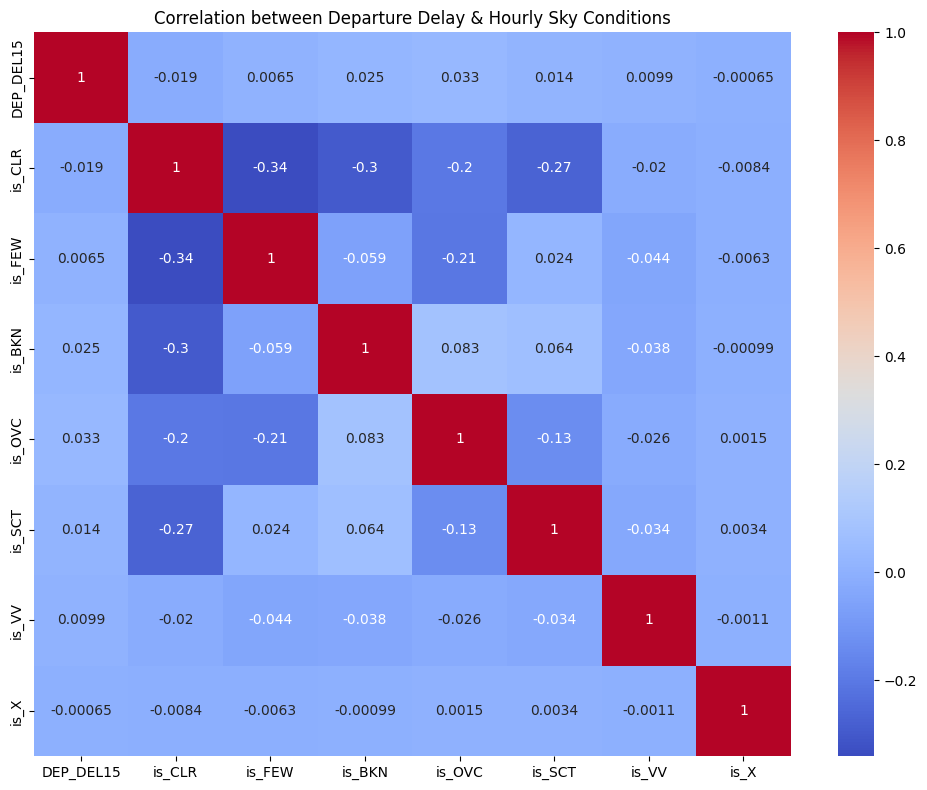

In [0]:
bool_cols = ['DEP_DEL15', 'is_CLR', 'is_FEW', 'is_BKN', 'is_OVC', 'is_SCT', 'is_VV', 'is_X']
corr_data = train_df.select(bool_cols).toPandas().corr()

# Plot the data
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr_data, annot=True, cmap='coolwarm', ax=ax)
plt.title('Correlation between Departure Delay & Hourly Sky Conditions')
plt.tight_layout()
plt.show()

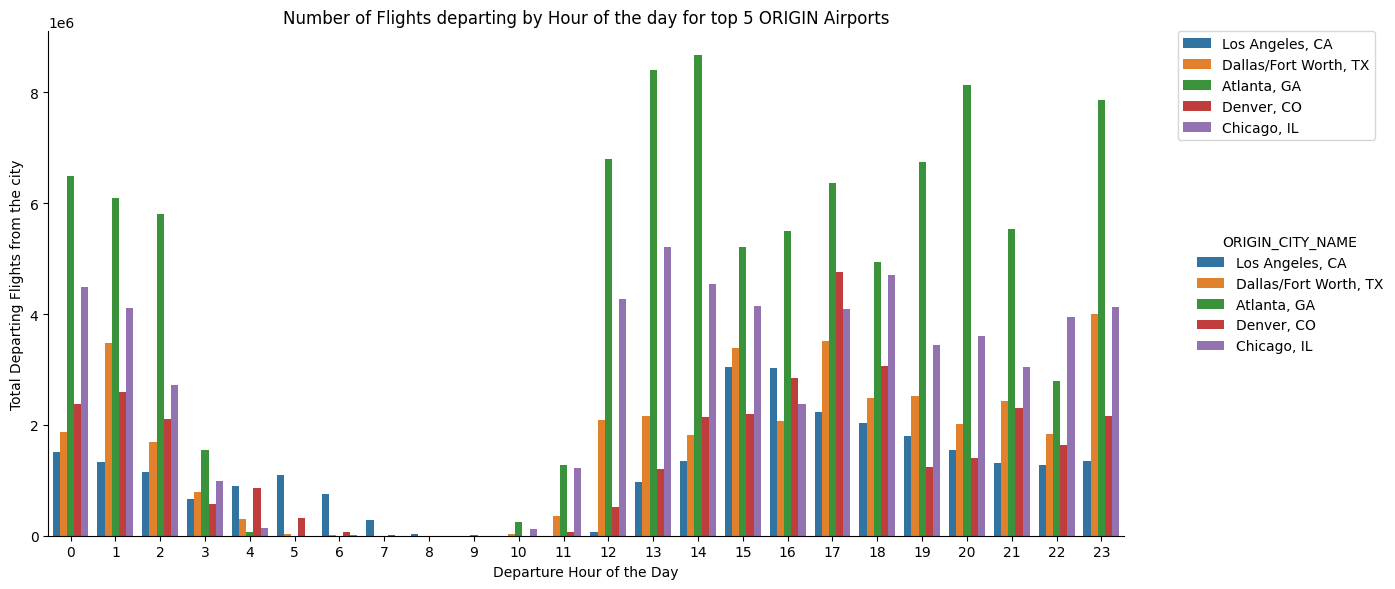

In [0]:
group_cols = ['dep_hour', 'ORIGIN_CITY_NAME']
plot_data = train_df.groupBy(group_cols).agg({'num_fl_departing_this_hour_ORIGIN': 'sum'}).toPandas()

# Get the top 10 origins by total sum of num_fl_departing_this_hour_ORIGIN
top_origins = plot_data.groupby('ORIGIN_CITY_NAME').agg({'sum(num_fl_departing_this_hour_ORIGIN)': 'sum'}).nlargest(5, columns='sum(num_fl_departing_this_hour_ORIGIN)').index

# Filter the data to only include the top 10 origins
plot_data = plot_data[plot_data['ORIGIN_CITY_NAME'].isin(top_origins)]

# Plot the data
sns.catplot(x='dep_hour', y='sum(num_fl_departing_this_hour_ORIGIN)', hue='ORIGIN_CITY_NAME', data=plot_data, kind='bar', height=6, aspect=2)

plt.title('Number of Flights departing by Hour of the day for top 5 ORIGIN Airports')
plt.xlabel('Departure Hour of the Day')
plt.ylabel('Total Departing Flights from the city')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.tight_layout()
plt.show()


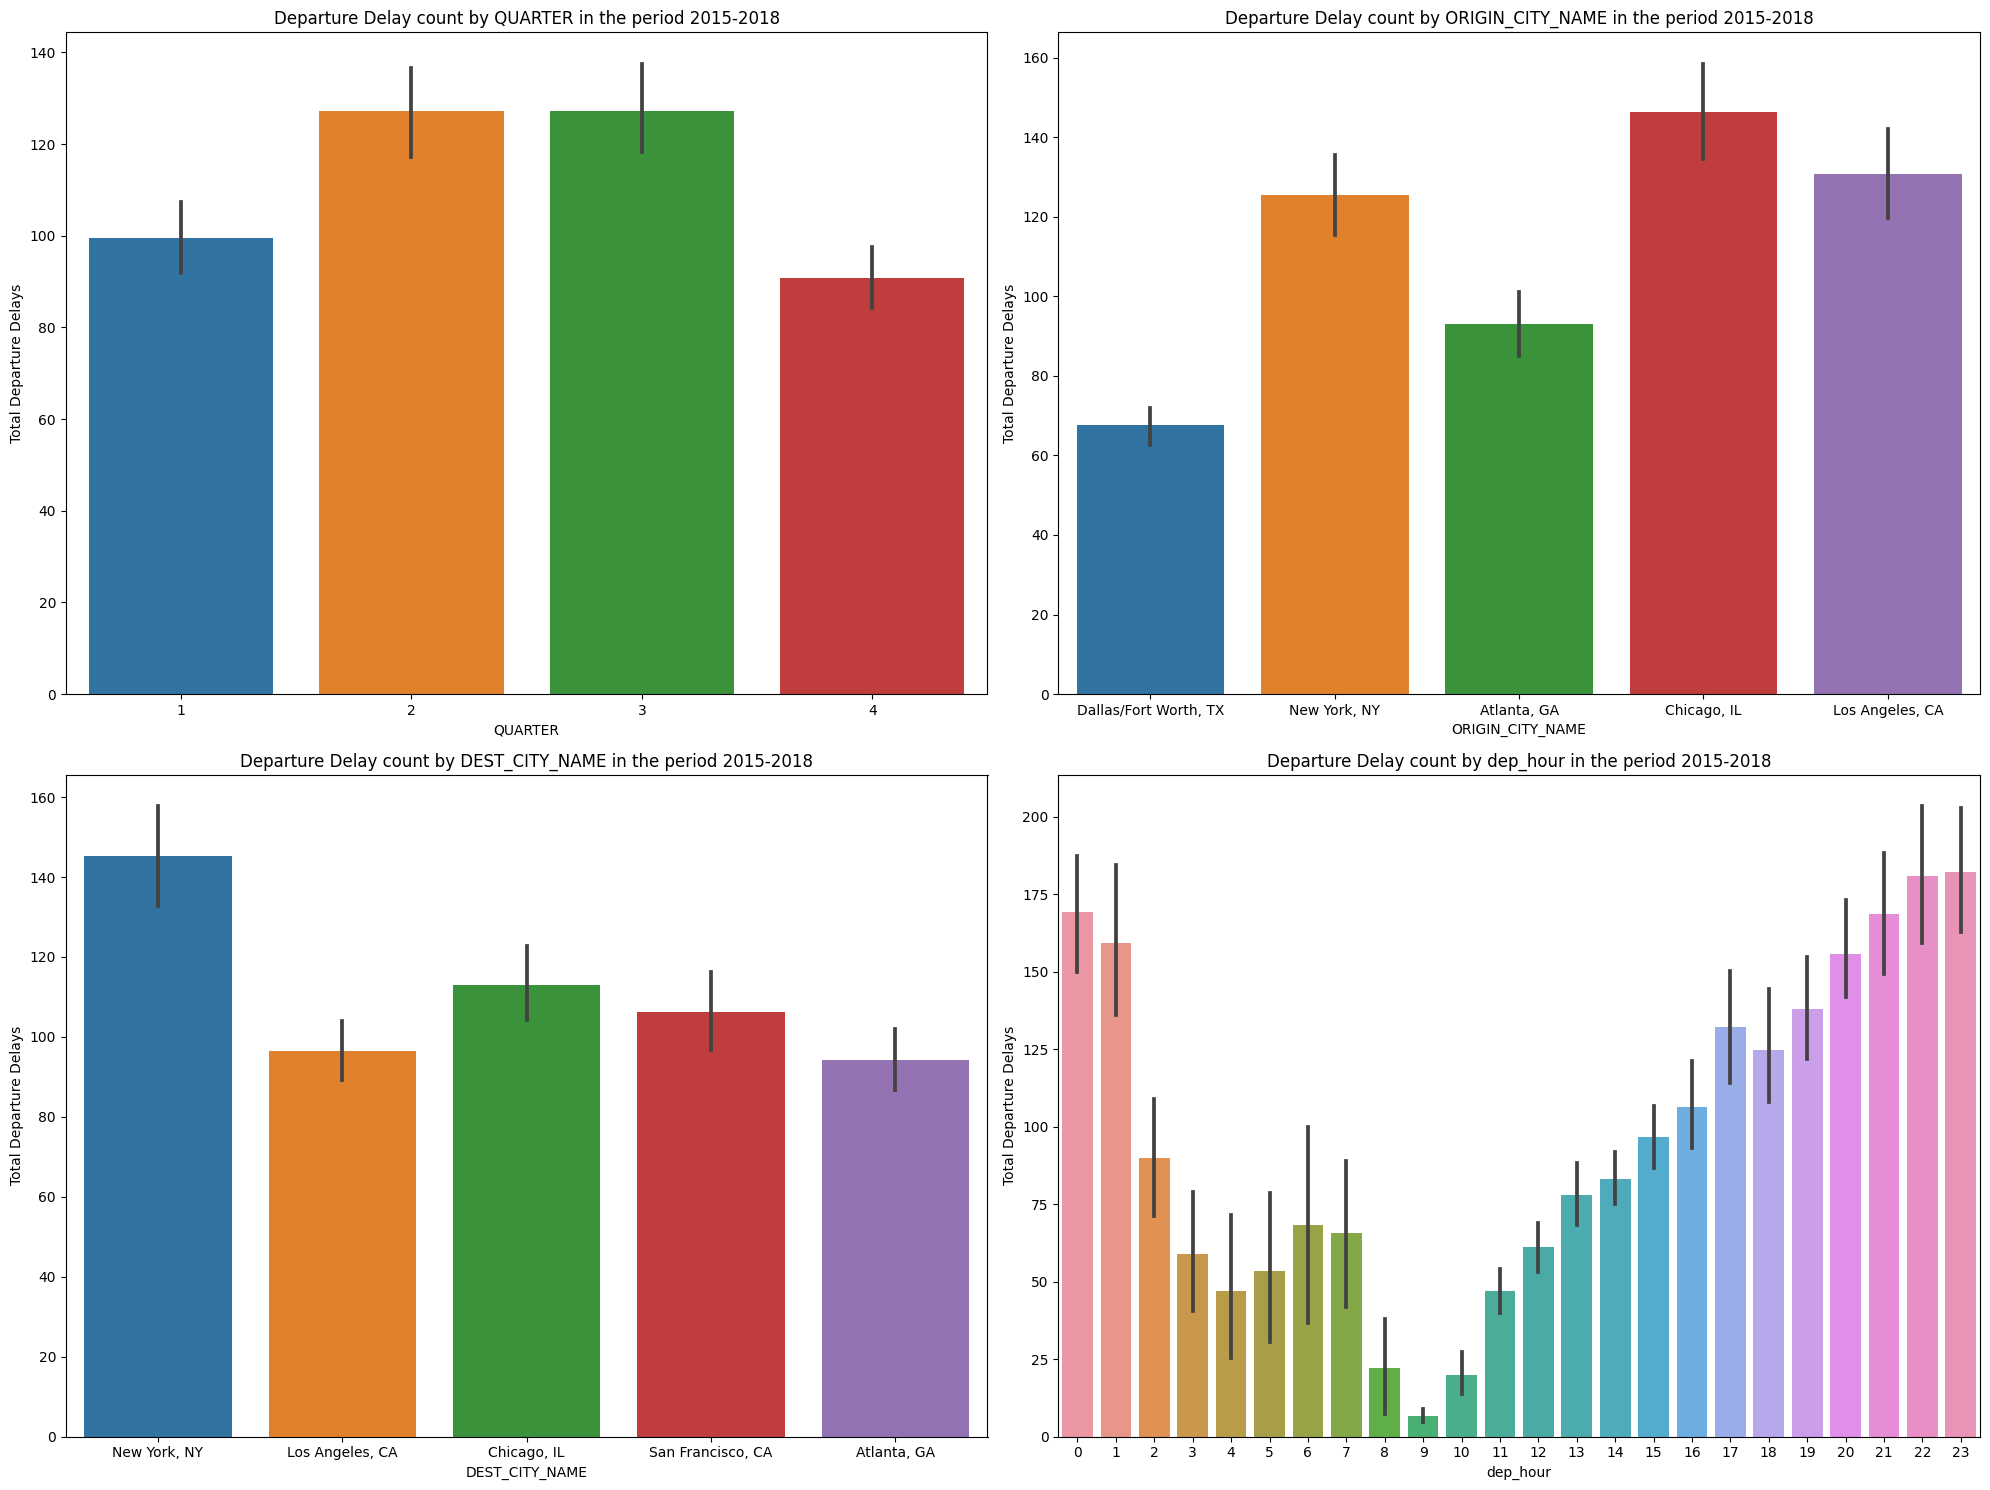

In [0]:
group_cols = ['QUARTER', 'ORIGIN_CITY_NAME', 'DEST_CITY_NAME', 'dep_hour']
plot_data = train_df.groupBy(group_cols).agg({'DEP_DEL15': 'sum'}).toPandas()

# Get the top 5 origin and destination cities by total sum of DEP_DEL15 field
top_origins = plot_data.groupby('ORIGIN_CITY_NAME').agg({'sum(DEP_DEL15)': 'sum'}).nlargest(5, columns='sum(DEP_DEL15)').index
top_dests = plot_data.groupby('DEST_CITY_NAME').agg({'sum(DEP_DEL15)': 'sum'}).nlargest(5, columns='sum(DEP_DEL15)').index

# Filter the data to only include the top 5 origin and destination cities. 
plot_data = plot_data[plot_data['ORIGIN_CITY_NAME'].isin(top_origins) & plot_data['DEST_CITY_NAME'].isin(top_dests)]

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 15))
for i, group_col in enumerate(group_cols):
    row = i // 2
    col = i % 2
    sns.barplot(x=group_col, y='sum(DEP_DEL15)', data=plot_data, ax=axes[row][col])
    axes[row][col].set_title(f'Departure Delay count by {group_col} in the period 2015-2018')
    axes[row][col].set_ylabel("Total Departure Delays")
plt.tight_layout()
plt.show()


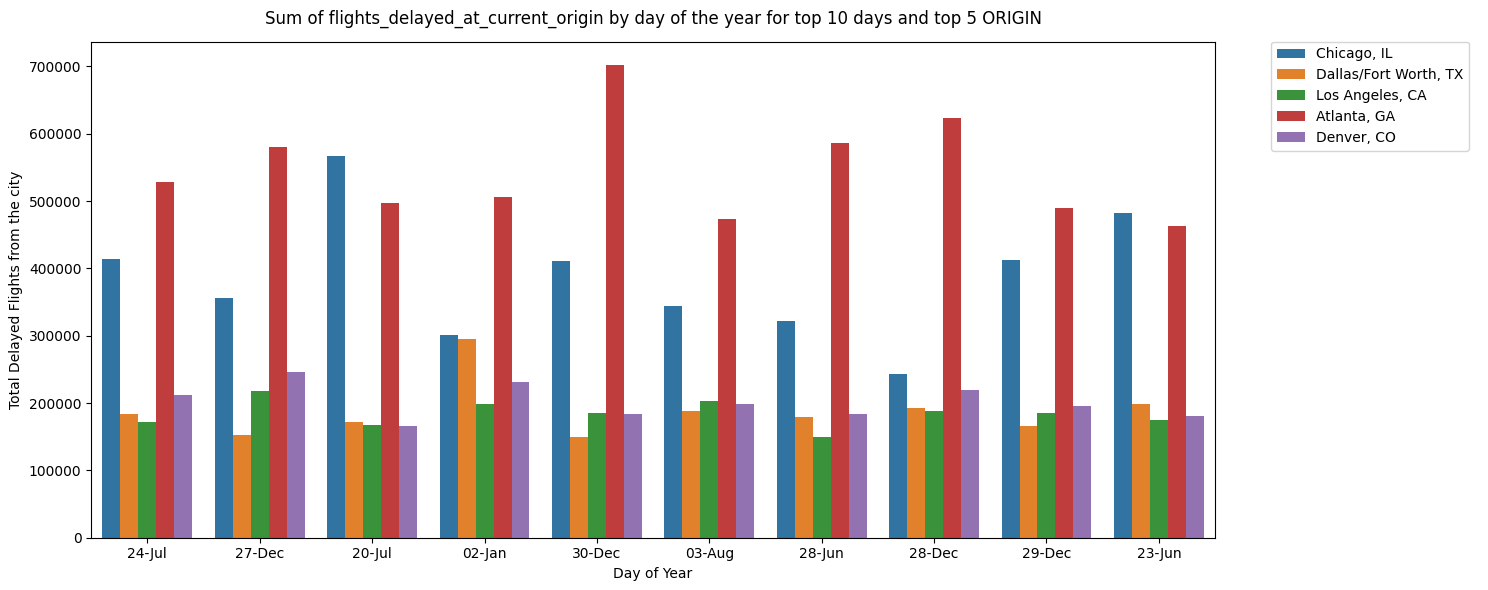

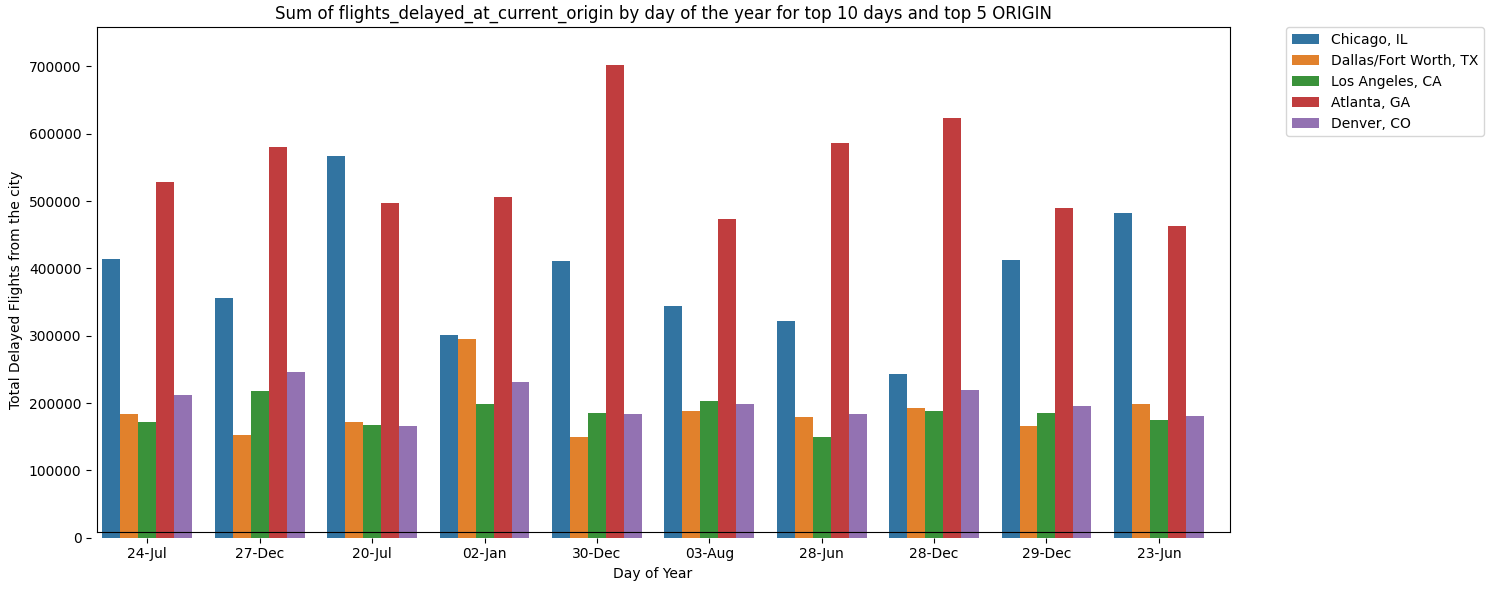

In [0]:
from pyspark.sql.functions import date_format

train_df = train_df.withColumn('day_of_year', date_format('FL_DATE', 'dd-MMM'))

group_cols = ['day_of_year', 'ORIGIN_CITY_NAME']
plot_data = train_df.groupBy(group_cols).agg({'flights_delayed_at_current_origin': 'sum'}).toPandas()

top_days = plot_data.groupby('day_of_year').agg({'sum(flights_delayed_at_current_origin)': 'sum'}).nlargest(10, columns='sum(flights_delayed_at_current_origin)').index

top_origins = plot_data.groupby('ORIGIN_CITY_NAME').agg({'sum(flights_delayed_at_current_origin)': 'sum'}).nlargest(5, columns='sum(flights_delayed_at_current_origin)').index

plot_data = plot_data[plot_data['day_of_year'].isin(top_days) & plot_data['ORIGIN_CITY_NAME'].isin(top_origins)]

fig, ax = plt.subplots(figsize=(15, 6))
sns.barplot(x='day_of_year', y='sum(flights_delayed_at_current_origin)', hue='ORIGIN_CITY_NAME', data=plot_data, ax=ax)
plt.title('Sum of flights_delayed_at_current_origin by day of the year for top 10 days and top 5 ORIGIN')
plt.xlabel('Day of Year')
plt.ylabel('Total Delayed Flights from the city')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.tight_layout()
plt.show()


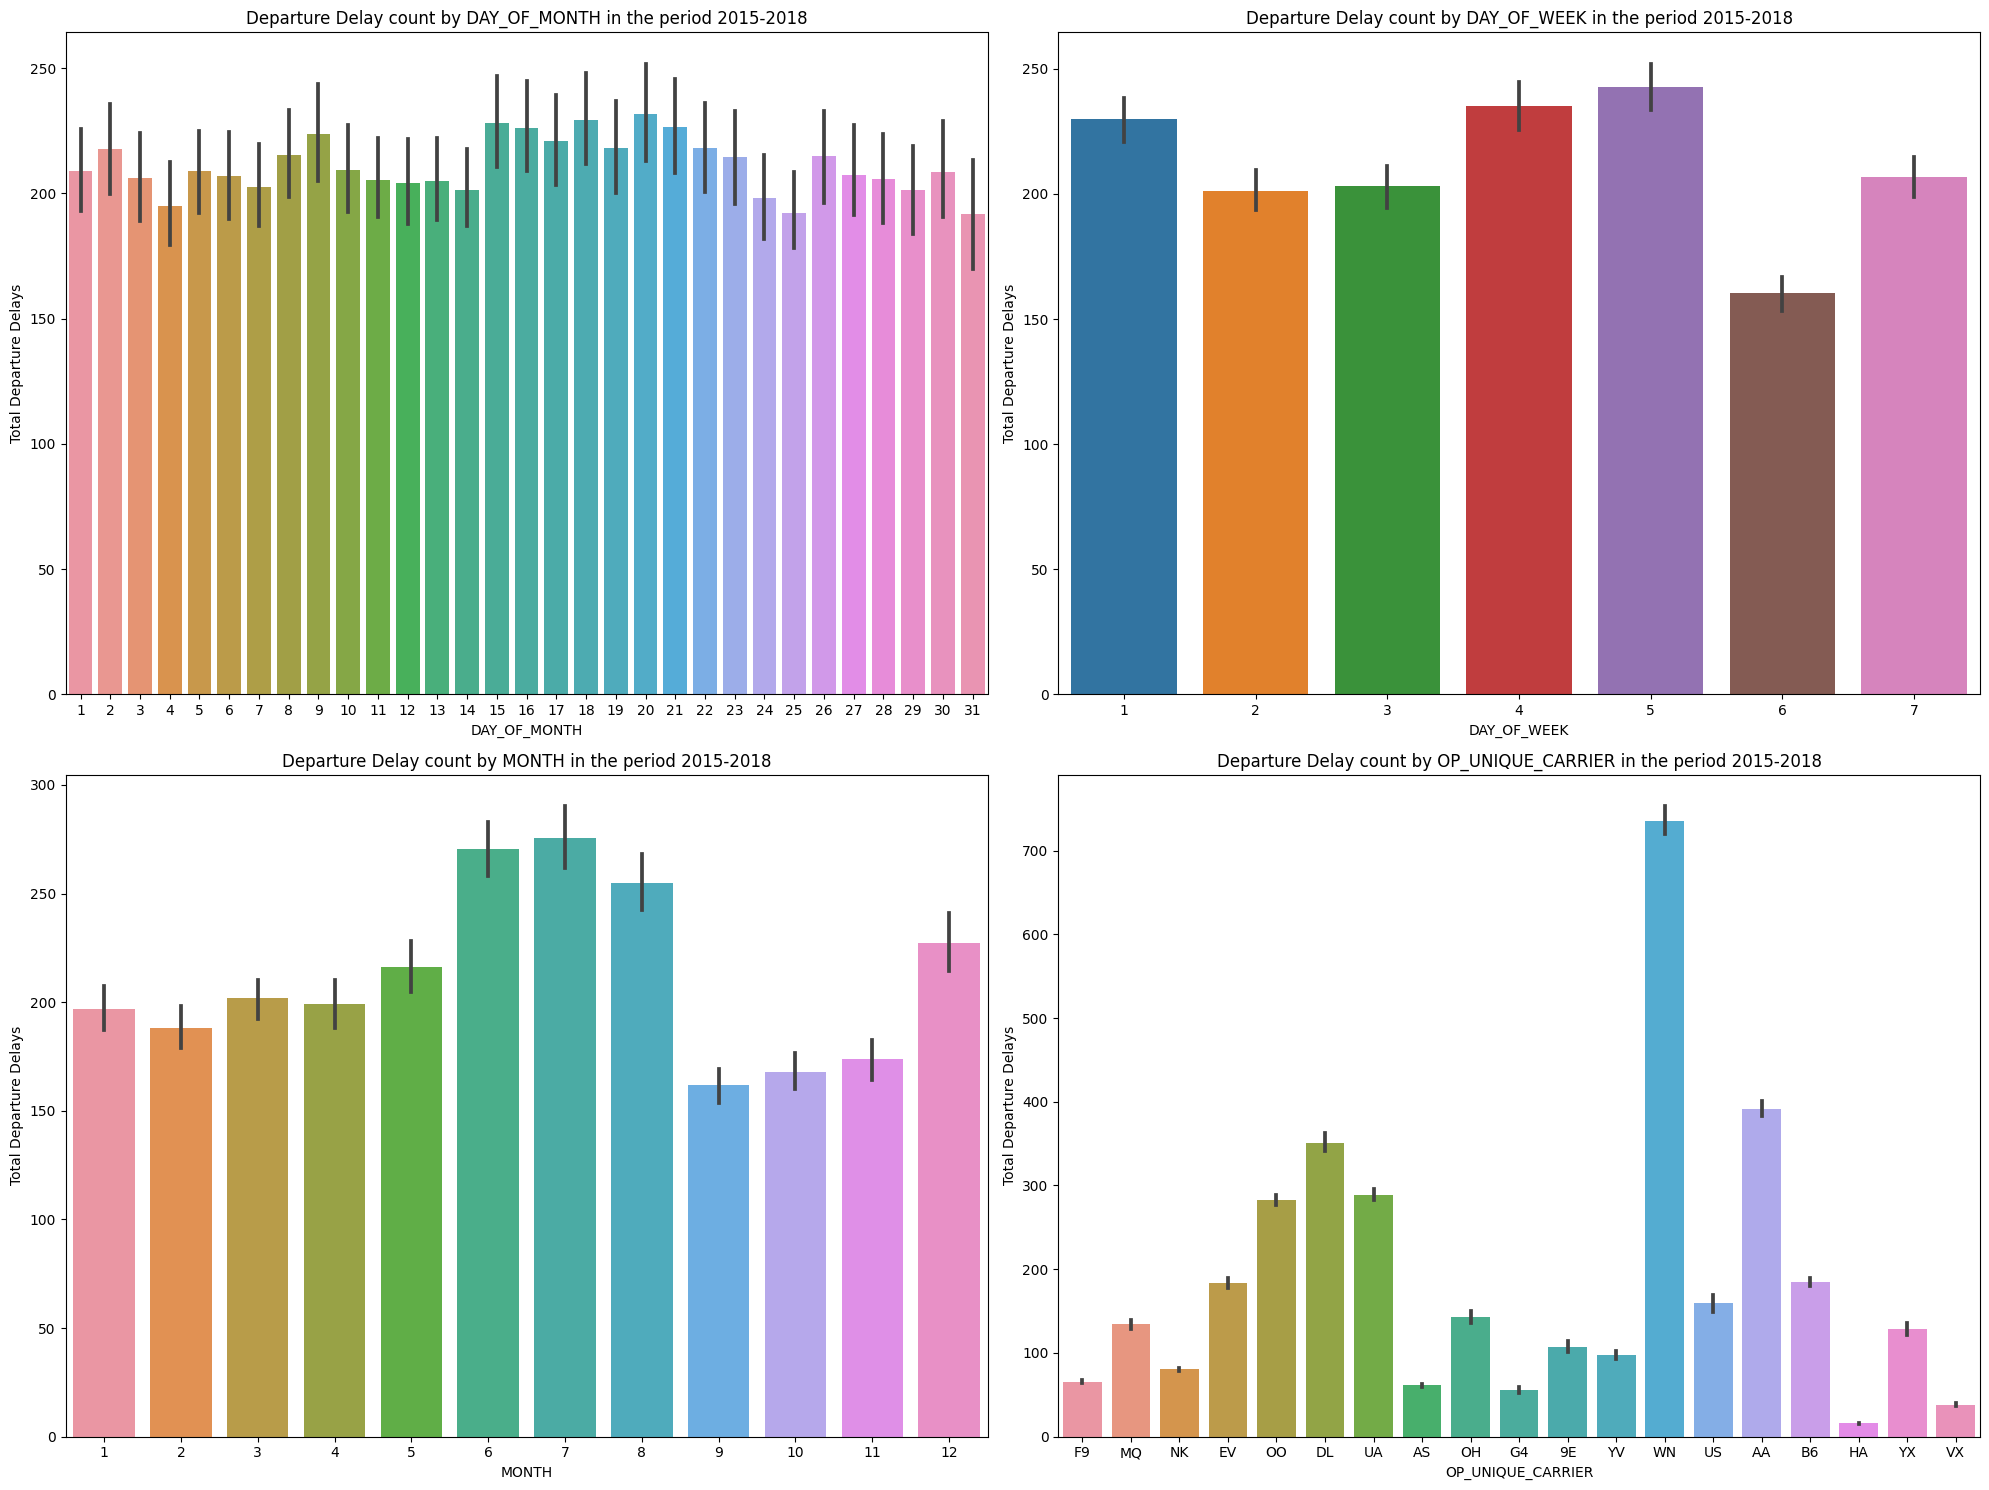

In [0]:
group_cols = ['DAY_OF_MONTH', 'DAY_OF_WEEK', 'MONTH', 'OP_UNIQUE_CARRIER'] #'QUARTER', 'ORIGIN', 'DEST', 'dep_hour'
plot_data = train_df.groupBy(group_cols).agg({'DEP_DEL15': 'sum'}).toPandas()

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 15))
for i, group_col in enumerate(group_cols):
    row = i // 2
    col = i % 2
    sns.barplot(x=group_col, y='sum(DEP_DEL15)', data=plot_data, ax=axes[row][col])
    axes[row][col].set_title(f'Departure Delay count by {group_col} in the period 2015-2018')
    axes[row][col].set_ylabel("Total Departure Delays")
plt.tight_layout()
plt.show()

## ML training & analysis

In [0]:
from pyspark.sql import functions as f
from pyspark.ml.feature import OneHotEncoder, StringIndexer, Imputer
from pyspark.ml import Pipeline
from pyspark.ml.feature import VectorAssembler
from pyspark.sql.functions import unix_timestamp
# Spark Session, Pipeline, Functions, and Metrics
from pyspark import SparkContext, SparkConf
from pyspark.sql import SQLContext
from pyspark.ml.feature import OneHotEncoder, StringIndexer, StandardScaler, VectorAssembler
from pyspark.ml import Pipeline
from pyspark.sql.functions import rand
from pyspark.mllib.evaluation import MulticlassMetrics
# Import models, param search, and evaluation metrics
from pyspark.ml.tuning import CrossValidator
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.classification import GBTClassifier
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.ml.tuning import ParamGridBuilder
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.classification import MultilayerPerceptronClassifier
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator
from pyspark.ml.evaluation import BinaryClassificationEvaluator, MulticlassClassificationEvaluator
from pyspark.mllib.evaluation import MulticlassMetrics
import matplotlib.pyplot as plt
import seaborn as sns

def prepML(train_df, val_df):
    """This function prepares the dataset for ML tuning"""
    global DATE_COLS ,NUM_FEATURES_COLS, CAT_FEATURES_COLS, LABEL
    # Exclude the first and last column from the imputation and conversion to float
    NUM_FEATURES_COLS_TO_IMPUTE = NUM_FEATURES_COLS[:-1]

    # Cast to float type
    #train_df = train_df.select(*(f.col(c).cast("float").alias(c) for c in NUM_FEATURES_COLS[1:]), *(f.col(c).alias(c) for c in CAT_FEATURES_COLS)).cache()
    train_df_day = train_df.select(*(f.col(c).alias(c) for c in DATE_COLS),
                            *(f.col(c).cast("float").alias(c) for c in NUM_FEATURES_COLS[:]), 
                            *(f.col(c).alias(c) for c in CAT_FEATURES_COLS)).cache()

    #val_df = val_df.select(*(f.col(c).cast("float").alias(c) for c in NUM_FEATURES_COLS[1:]), *(f.col(c).alias(c) for c in CAT_FEATURES_COLS)).cache()
    val_df_day = val_df.select(*(f.col(c).alias(c) for c in DATE_COLS),
                            *(f.col(c).cast("float").alias(c) for c in NUM_FEATURES_COLS[:]), 
                            *(f.col(c).alias(c) for c in CAT_FEATURES_COLS)).cache()
    
    # convert date to Unix timestamp (in seconds)
    train_df = train_df_day #.withColumn(NUM_FEATURES_COLS[0], unix_timestamp(NUM_FEATURES_COLS[0]))
    val_df = val_df_day #.withColumn(NUM_FEATURES_COLS[0], unix_timestamp(NUM_FEATURES_COLS[0]))
    print(train_df.count())
    print(val_df.count())

    # Imputer for numerical columns
    imputer = Imputer(inputCols=NUM_FEATURES_COLS_TO_IMPUTE, 
                    outputCols=[f"{col}_imputed" for col in NUM_FEATURES_COLS_TO_IMPUTE])

    # StringIndexer and OneHotEncoder for categorical columns
    indexers = [StringIndexer(inputCol=column, outputCol=column+"_index").setHandleInvalid("keep") for column in CAT_FEATURES_COLS]
    encoders = [OneHotEncoder(inputCol=column+"_index", outputCol=column+"_ohe", handleInvalid='keep') for column in CAT_FEATURES_COLS]

    # Assembling mixed data type transformations
    assembler = VectorAssembler(inputCols=[NUM_FEATURES_COLS[0]] + [f"{col}_imputed" for col in NUM_FEATURES_COLS_TO_IMPUTE] + [encoder.getOutputCol() for encoder in encoders], 
                                outputCol="features",
                                handleInvalid='skip')

    # Pipeline stages
    stages = [imputer] + indexers + encoders + [assembler]

    # Setup the pipeline
    pipeline = Pipeline(stages=stages)

    # Fit the pipeline to training data
    model = pipeline.fit(train_df)

    # Transform the data
    train_df = model.transform(train_df).cache()
    val_df = model.transform(val_df).cache()

    train_texperiment_df = train_df.dropna(subset=['DEP_DEL15']).cache()
    val_texperiment_df = val_df.dropna(subset=['DEP_DEL15']).cache()
    train_texperiment_df = train_texperiment_df.select([ 'features', 'DEP_DEL15']).cache()
    val_texperiment_df = val_texperiment_df.select([ 'features', 'DEP_DEL15']).cache()

    evaluator = BinaryClassificationEvaluator(rawPredictionCol="rawPrediction", labelCol='DEP_DEL15', metricName="areaUnderROC")

    return train_texperiment_df, val_texperiment_df, evaluator


In [0]:
def trainandeval_lr(train_df, val_df):
    """
    This function does training and evaluation for Logistic Regression with grid search
    """
    ## Call the function to set everything up for the training like Imputer, Assembler, Indexer, Encoders etc.
    train_texperiment_df, val_texperiment_df, evaluator = prepML(train_df, val_df)

    train_texperiment_df.cache()
    val_texperiment_df.cache()

    # Instantiate Logistic Regression
    lr = LogisticRegression(featuresCol='features', labelCol='DEP_DEL15')

    # Set up grid for Logistic Regression
    lr_paramGrid = (ParamGridBuilder()
                .addGrid(lr.regParam, [ 0.00001]) #0.01
                .addGrid(lr.elasticNetParam, [0, 0.5 ])
                .build())


    # Perform grid search
    lr_crossval = CrossValidator(estimator=lr,
                            estimatorParamMaps=lr_paramGrid,
                            evaluator=evaluator,
                            numFolds=5)  

    # Train and evaluate Model
    lr_cvModel = lr_crossval.fit(train_texperiment_df)
    print('Logistic Regression Training AUC: ', evaluator.evaluate(lr_cvModel.transform(train_texperiment_df)))
    print('Logistic Regression Validation AUC: ', evaluator.evaluate(lr_cvModel.transform(val_texperiment_df)))


    # Report the best hyperparameters
    bestModel = lr_cvModel.bestModel
    print('Best regParam:', bestModel._java_obj.getRegParam())
    print('Best elasticNetParam:', bestModel._java_obj.getElasticNetParam())

    # Make predictions on the validation dataset
    predictions = lr_cvModel.transform(val_texperiment_df)



    # Compute accuracy, precision, recall, and f1 score
    evaluator_accuracy = MulticlassClassificationEvaluator(labelCol='DEP_DEL15', metricName='accuracy')
    evaluator_precision = MulticlassClassificationEvaluator(labelCol='DEP_DEL15', metricName='weightedPrecision')
    evaluator_recall = MulticlassClassificationEvaluator(labelCol='DEP_DEL15', metricName='weightedRecall')
    evaluator_f1 = MulticlassClassificationEvaluator(labelCol='DEP_DEL15', metricName='f1')
    accuracy = evaluator_accuracy.evaluate(predictions)
    precision = evaluator_precision.evaluate(predictions)
    recall = evaluator_recall.evaluate(predictions)
    f1 = evaluator_f1.evaluate(predictions)

    # Print accuracy, precision, recall, and f1 score
    print('Accuracy:', accuracy)
    print('Precision:', precision)
    print('Recall:', recall)
    print('F1 score:', f1)
    # Compute confusion matrix
    predictionAndLabels = predictions.select('prediction', 'DEP_DEL15').rdd
    metrics = MulticlassMetrics(predictionAndLabels)

    confusion_matrix = metrics.confusionMatrix().toArray()

    confusion_matrix = confusion_matrix.astype('float') / confusion_matrix.sum(axis=1)[:, np.newaxis]

    # Plot confusion matrix using seaborn heatmap
    plt.figure(figsize=(5, 5))
    sns.heatmap(confusion_matrix, annot=True, fmt='.2%', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

In [0]:
def trainandeval_mlp(train_df, val_df):
    """
    This function trains and evaluates on multi layer perceptron.
    """
    train_texperiment_df, val_texperiment_df, evaluator = prepML(train_df, val_df)
    # Define the feature and label columns
    featuresCol = 'features'
    labelCol = 'DEP_DEL15'

    train_texperiment_df.cache()
    val_texperiment_df.cache()


    # Define the layers for the MLP neural network
    # Input layer size is the number of features, output layer size is 2 for binary classification
    # Hidden layer size is 1-2 fully connected layer with an arbitrary number of perceptrons

    layers = [len(train_texperiment_df.select(featuresCol).first()[0]), 80, 60, 40, 32, 24, 16, 8, 2] ## Changed this to lesser no of layers, just 3 for now and more perceptrons

    
    print("These are the layers of the MLP", layers)

    # Instantiate MLP classifier -- Is MLP the best or LSTM? Or 
    mlp = MultilayerPerceptronClassifier(featuresCol=featuresCol, labelCol=labelCol, layers=layers)

    # Set up grid for MLP
    mlp_paramGrid = (ParamGridBuilder()
                .addGrid(mlp.maxIter, [100])
                .addGrid(mlp.stepSize, [0.00001]) # 0.1, 0.01 , 0.00001, 0.0001
                .addGrid(mlp.blockSize, [256])
                .addGrid(mlp.solver, ['l-bfgs']) #, 'gd'
                .build())

    # Perform grid search
    mlp_crossval = CrossValidator(estimator=mlp,
                            estimatorParamMaps=mlp_paramGrid,
                            evaluator=evaluator,
                            numFolds=3)  

    # Train and evaluate Model
    print("Starting the training")
    mlp_cvModel = mlp_crossval.fit(train_texperiment_df)
    print("Finished the training")
    print('MLP Training AUC: ', evaluator.evaluate(mlp_cvModel.transform(train_texperiment_df)))
    print('MLP Validation AUC: ', evaluator.evaluate(mlp_cvModel.transform(val_texperiment_df)))

    # Compute accuracy, precision and recall
    accuracy_evaluator = MulticlassClassificationEvaluator(labelCol=labelCol, predictionCol="prediction", metricName="accuracy")
    precision_evaluator = MulticlassClassificationEvaluator(labelCol=labelCol, predictionCol="prediction", metricName="weightedPrecision")
    recall_evaluator = MulticlassClassificationEvaluator(labelCol=labelCol, predictionCol="prediction", metricName="weightedRecall")

    train_predictions = mlp_cvModel.transform(train_texperiment_df)
    val_predictions = mlp_cvModel.transform(val_texperiment_df)

    # This takes a long time to run not sure why
    print('MLP Training Accuracy: ', accuracy_evaluator.evaluate(train_predictions))
    print('MLP Validation Accuracy: ', accuracy_evaluator.evaluate(val_predictions))

    print('MLP Training Precision: ', precision_evaluator.evaluate(train_predictions))
    print('MLP Validation Precision: ', precision_evaluator.evaluate(val_predictions))

    print('MLP Training Recall: ', recall_evaluator.evaluate(train_predictions))
    print('MLP Validation Recall: ', recall_evaluator.evaluate(val_predictions))


    predictionAndLabels = val_predictions.select("prediction", labelCol).rdd.map(lambda r: (float(r[0]), float(r[1])))
    metrics = MulticlassMetrics(predictionAndLabels)
    confusion_matrix = metrics.confusionMatrix().toArray()
    print(confusion_matrix)
    # Plot confusion matrix
    plt.figure(figsize=(5,5))
    sns.heatmap(confusion_matrix, annot=True, fmt=".0f", linewidths=.5, square=True, cmap='Blues_r')
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    plt.title('MLP Validation Confusion Matrix', size=15)
    plt.show()

## ATTEMPTS & EXPERIMENTS 

#### Features used across all attempts

The following are multiple attempts with led us to the final section of this notebook where we stopped and said we were satisfied for now with the `AUC`


Features Used:

 1. HourlySeaLevelPressure
 2. DISTANCE
 3. MIN_DIST_FROM_HOLIDAY
 4. HourlyAltimeterSetting
 5. HourlyDewPointTemperature
 6. HourlyDryBulbTemperature
 7. HourlyPressureChange
 8. previous_flight_delay_status
 9. Outlinks
 10. num_fl_departing_this_hour_ORIGIN
 11. num_fl_arriving_this_hour_ORIGIN
 12. HourlyPrecipitation
 13. HourlyRelativeHumidity
 14. HourlySeaLevelPressure
 15. HourlyStationPressure
 16. HourlyWetBulbTemperature
 17. HourlyWindDirection
 18. HourlyWindSpeed
 19. total_flights_on_fl_date_origin --- How many flights are scheudled to depart on the day being assessed for an upcoming flight (no leakage since this is known in advance)
 `Hourly Sky Condition Flags
 20. is_CLR
 21. is_FEW
 22. is_BKN 
 23. is_OVC
 24. is_SCT
 25. is_VV
 26. is_X
 `Extracted from METAR REM`
 27. temperature_fahrenheit
 28. Is_Holiday
 29. Elevation
 `Categorical`
 30. DAY_OF_MONTH
 31. DAY_OF_WEEK
 32. FL_ID
 33. OP_UNIQUE_CARRIER
 34. ORIGIN
 35. DEST
 36. dep_Hour
 37. QUARTER
 38. MONTH
 39. origin_type

 
 The following is `Based on 2 hour before rolling count of delayed flights at that ORIGIN airport -- gave a 3 point boost in AUC`
This will be known 2 hours before the departure 

 40. flights_delayed_at_current_origin 
 
### TARGET 
     DEP_DEL15

In [0]:
## This is the main cell from where all ML will be called

DATE_COLS = [ 'sched_depart_date_time_UTC','two_hours_prior_depart_UTC']
# Make sure 'DEP_DEL15' is the last value in this list
#'FL_DATE',
NUM_FEATURES_COLS = ['HourlyWindGustSpeed', 'DISTANCE', 'MIN_DIST_FROM_HOLIDAY', 'HourlyAltimeterSetting', 
                     'HourlyDewPointTemperature', 'HourlyDryBulbTemperature',  'HourlyPressureChange', 'previous_flight_delay_status', 
                     'Outlinks','num_fl_departing_this_hour_ORIGIN', 'num_fl_arriving_this_hour_ORIGIN',  'HourlyPrecipitation', 'HourlyRelativeHumidity', 
                     'HourlySeaLevelPressure', 'HourlyStationPressure',  'HourlyWetBulbTemperature', 'HourlyWindDirection', 'HourlyWindSpeed', 'total_flights_on_fl_date_origin', 
                     'is_CLR', 'is_FEW', 'is_BKN', 'is_OVC', 'is_SCT', 'is_VV', 'is_X',  'temperature_fahrenheit', 'Is_Holiday', 'Elevation', 'DEP_DEL15']
CAT_FEATURES_COLS = ['DAY_OF_MONTH','DAY_OF_WEEK', 'FL_ID', 'OP_UNIQUE_CARRIER',  'ORIGIN', 'DEST', 'dep_Hour',  'QUARTER', 'MONTH','origin_type']
LABEL = 'DEP_DEL15'

## Call the function to do Logistic Regression
trainandeval_lr(train_df, val_df)

Logistic Regression Training AUC:  0.7754598347899548
Logistic Regression Validation AUC:  0.766544342857602
Best regParam: 0.001
Best elasticNetParam: 0.0
Accuracy: 0.8444167768550745
Precision: 0.8259612272997252
Recall: 0.8444167768550745
F1 score: 0.823940615419789


/databricks/spark/python/pyspark/sql/context.py:165: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


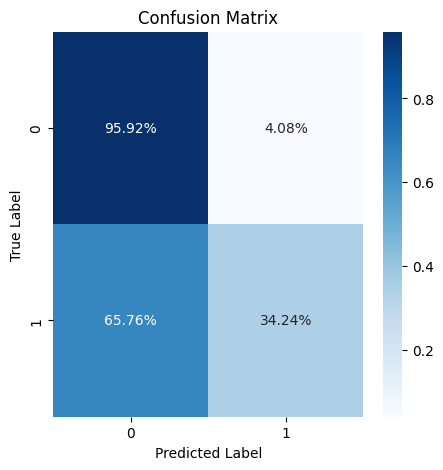

In [0]:
## This is the main cell from where all ML will be called

DATE_COLS = [ 'sched_depart_date_time_UTC','two_hours_prior_depart_UTC']
# Make sure 'DEP_DEL15' is the last value in this list
#'FL_DATE',
NUM_FEATURES_COLS = ['HourlyWindGustSpeed', 'DISTANCE', 'MIN_DIST_FROM_HOLIDAY', 'HourlyAltimeterSetting', 
                     'HourlyDewPointTemperature', 'HourlyDryBulbTemperature',  'HourlyPressureChange', 'previous_flight_delay_status', 
                     'Outlinks','num_fl_departing_this_hour_ORIGIN', 'num_fl_arriving_this_hour_ORIGIN',  'HourlyPrecipitation', 'HourlyRelativeHumidity', 
                     'HourlySeaLevelPressure', 'HourlyStationPressure',  'HourlyWetBulbTemperature', 'HourlyWindDirection', 'HourlyWindSpeed', 'total_flights_on_fl_date_origin', 
                     'temperature_fahrenheit', 'Is_Holiday', 'DEP_DEL15']
CAT_FEATURES_COLS = ['DAY_OF_MONTH','DAY_OF_WEEK',  'OP_UNIQUE_CARRIER',  'ORIGIN', 'DEST', 
                     'is_CLR', 'is_FEW', 'is_BKN', 'is_OVC', 'is_SCT', 'is_VV', 'is_X',
                     'dep_Hour',  'QUARTER', 'MONTH','origin_type'] #'FL_ID',
LABEL = 'DEP_DEL15'

## Call the function to do Logistic Regression
trainandeval_lr(train_df, val_df)

In [0]:
train_df = spark.read.format("delta").load(f"{team_blob_url}/saket_output_delta_FinalML_9723PM/")
val_df = spark.read.format("delta").load(f"{team_blob_url}/saket_output_delta_val_FinalML_9723_PM/")

In [0]:
train_df = train_df.select('sched_depart_date_time_UTC','two_hours_prior_depart_UTC','HourlyWindGustSpeed', 'DISTANCE', 'MIN_DIST_FROM_HOLIDAY', 'HourlyAltimeterSetting', 
                     'HourlyDewPointTemperature', 'HourlyDryBulbTemperature',  'HourlyPressureChange', 'previous_flight_delay_status', 
                     'Outlinks','num_fl_departing_this_hour_ORIGIN', 'num_fl_arriving_this_hour_ORIGIN',  'HourlyPrecipitation', 'HourlyRelativeHumidity', 
                     'HourlySeaLevelPressure', 'HourlyStationPressure',  'HourlyWetBulbTemperature', 'HourlyWindDirection', 'HourlyWindSpeed', 'total_flights_on_fl_date_origin', 
                     'temperature_fahrenheit', 'Is_Holiday', 'DEP_DEL15','DAY_OF_MONTH','DAY_OF_WEEK',  'OP_UNIQUE_CARRIER',  'ORIGIN', 'DEST', 
                     'is_CLR', 'is_FEW', 'is_BKN', 'is_OVC', 'is_SCT', 'is_VV', 'is_X',
                     'dep_Hour',  'QUARTER', 'MONTH','origin_type','dest_type')
val_df = val_df.select ('sched_depart_date_time_UTC','two_hours_prior_depart_UTC','HourlyWindGustSpeed', 'DISTANCE', 'MIN_DIST_FROM_HOLIDAY', 'HourlyAltimeterSetting', 
                     'HourlyDewPointTemperature', 'HourlyDryBulbTemperature',  'HourlyPressureChange', 'previous_flight_delay_status', 
                     'Outlinks','num_fl_departing_this_hour_ORIGIN', 'num_fl_arriving_this_hour_ORIGIN',  'HourlyPrecipitation', 'HourlyRelativeHumidity', 
                     'HourlySeaLevelPressure', 'HourlyStationPressure',  'HourlyWetBulbTemperature', 'HourlyWindDirection', 'HourlyWindSpeed', 'total_flights_on_fl_date_origin', 
                     'temperature_fahrenheit', 'Is_Holiday', 'DEP_DEL15','DAY_OF_MONTH','DAY_OF_WEEK',  'OP_UNIQUE_CARRIER',  'ORIGIN', 'DEST', 
                     'is_CLR', 'is_FEW', 'is_BKN', 'is_OVC', 'is_SCT', 'is_VV', 'is_X',
                     'dep_Hour',  'QUARTER', 'MONTH','origin_type','dest_type')

In [0]:
findnullincols(train_df)

date_columns ['sched_depart_date_time_UTC', 'two_hours_prior_depart_UTC']
HourlyWindGustSpeed: 0 NULL values, 0 NaN values, 0 blank values
DISTANCE: 0 NULL values, 0 NaN values, 0 blank values
MIN_DIST_FROM_HOLIDAY: 0 NULL values, 0 NaN values, 0 blank values
HourlyAltimeterSetting: 0 NULL values, 0 NaN values, 0 blank values
HourlyDewPointTemperature: 0 NULL values, 0 NaN values, 0 blank values
HourlyDryBulbTemperature: 0 NULL values, 0 NaN values, 0 blank values
HourlyPressureChange: 15683530 NULL values, 0 NaN values, 0 blank values
previous_flight_delay_status: 194387 NULL values, 0 NaN values, 0 blank values
Outlinks: 0 NULL values, 0 NaN values, 0 blank values
num_fl_departing_this_hour_ORIGIN: 0 NULL values, 0 NaN values, 0 blank values
num_fl_arriving_this_hour_ORIGIN: 0 NULL values, 0 NaN values, 0 blank values
HourlyPrecipitation: 0 NULL values, 0 NaN values, 0 blank values
HourlyRelativeHumidity: 0 NULL values, 0 NaN values, 0 blank values
HourlySeaLevelPressure: 0 NULL valu

Logistic Regression Training AUC:  0.7744434112539695
Logistic Regression Validation AUC:  0.767565259898844
Best regParam: 0.0001
Best elasticNetParam: 0.0
Accuracy: 0.8451903519711523
Precision: 0.8271782247681826
Recall: 0.8451903519711522
F1 score: 0.8260389539201949


/databricks/spark/python/pyspark/sql/context.py:165: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


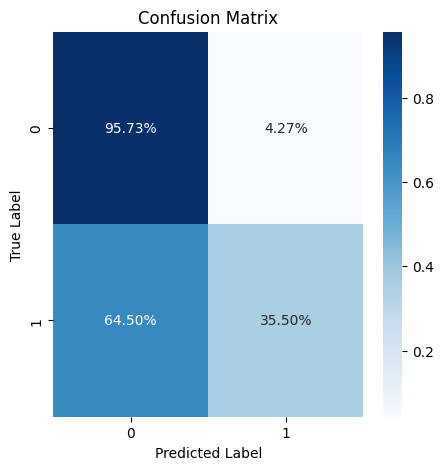

In [0]:
## This is the main cell from where all ML will be called

DATE_COLS = [ 'sched_depart_date_time_UTC','two_hours_prior_depart_UTC']
# Make sure 'DEP_DEL15' is the last value in this list
#'FL_DATE',
NUM_FEATURES_COLS = ['HourlyWindGustSpeed', 'DISTANCE', 'MIN_DIST_FROM_HOLIDAY', 'HourlyAltimeterSetting', 
                     'HourlyDewPointTemperature', 'HourlyDryBulbTemperature',  'HourlyPressureChange', 'previous_flight_delay_status', 
                     'Outlinks','num_fl_departing_this_hour_ORIGIN', 'num_fl_arriving_this_hour_ORIGIN',  'HourlyPrecipitation', 'HourlyRelativeHumidity', 
                     'HourlySeaLevelPressure', 'HourlyStationPressure',  'HourlyWetBulbTemperature', 'HourlyWindDirection', 'HourlyWindSpeed', 'total_flights_on_fl_date_origin', 
                     'temperature_fahrenheit', 'Is_Holiday', 'DEP_DEL15']
CAT_FEATURES_COLS = ['DAY_OF_MONTH','DAY_OF_WEEK',  'OP_UNIQUE_CARRIER',  'ORIGIN', 'DEST', 
                     'is_CLR', 'is_FEW', 'is_BKN', 'is_OVC', 'is_SCT', 'is_VV', 'is_X',
                     'dep_Hour',  'QUARTER', 'MONTH','origin_type','dest_type'] #'FL_ID',
LABEL = 'DEP_DEL15'

## Call the function to do Logistic Regression
trainandeval_lr(train_df, val_df)

Logistic Regression Training AUC:  0.7760820829891444
Logistic Regression Validation AUC:  0.769434053781007
Best regParam: 1e-05
Best elasticNetParam: 0.0
Accuracy: 0.8466710569392646
Precision: 0.8288664294473219
Recall: 0.8466710569392646
F1 score: 0.828306305610937


/databricks/spark/python/pyspark/sql/context.py:165: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


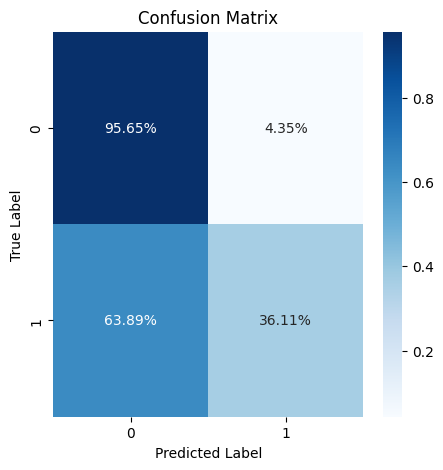

In [0]:
## TRAINING WITH NO DATE COLUMNS & REMOVED all NULLs from previous_flight_delay_status

train_df = spark.read.format("delta").load(f"{team_blob_url}/saket_output_delta_FinalML_nonull_10723PM/")
val_df = spark.read.format("delta").load(f"{team_blob_url}/saket_output_delta_val_FinalML_nonull_10723_PM/")    
DATE_COLS = [ ]
# Make sure 'DEP_DEL15' is the last value in this list
#'FL_DATE',
NUM_FEATURES_COLS = ['HourlyWindGustSpeed', 'DISTANCE', 'MIN_DIST_FROM_HOLIDAY', 'HourlyAltimeterSetting', 
                     'HourlyDewPointTemperature', 'HourlyDryBulbTemperature',  'HourlyPressureChange', 'previous_flight_delay_status', 
                     'Outlinks','num_fl_departing_this_hour_ORIGIN', 'num_fl_arriving_this_hour_ORIGIN',  'HourlyPrecipitation', 'HourlyRelativeHumidity', 
                     'HourlySeaLevelPressure', 'HourlyStationPressure',  'HourlyWetBulbTemperature', 'HourlyWindDirection', 'HourlyWindSpeed', 'total_flights_on_fl_date_origin', 
                     'temperature_fahrenheit', 'Is_Holiday','flights_delayed_at_current_origin', 'DEP_DEL15']
CAT_FEATURES_COLS = ['DAY_OF_MONTH','DAY_OF_WEEK',  'OP_UNIQUE_CARRIER',  'ORIGIN', 'DEST', 
                     'is_CLR', 'is_FEW', 'is_BKN', 'is_OVC', 'is_SCT', 'is_VV', 'is_X',
                     'dep_Hour',  'QUARTER', 'MONTH','origin_type','dest_type'] #'FL_ID',
LABEL = 'DEP_DEL15'

## Call the function to do Logistic Regression
trainandeval_lr(train_df, val_df)

In [0]:
findnullincols(val_df)

date_columns ['FL_DATE', 'sched_depart_date_time_UTC', 'two_hours_prior_depart_UTC']
Elevation: 0 NULL values, 0 NaN values, 0 blank values
ORIGIN: 0 NULL values, 0 NaN values, 0 blank values
OP_CARRIER_FL_NUM: 0 NULL values, 0 NaN values, 0 blank values
TAIL_NUM: 0 NULL values, 0 NaN values, 0 blank values
QUARTER: 0 NULL values, 0 NaN values, 0 blank values
DAY_OF_MONTH: 0 NULL values, 0 NaN values, 0 blank values
DAY_OF_WEEK: 0 NULL values, 0 NaN values, 0 blank values
OP_UNIQUE_CARRIER: 0 NULL values, 0 NaN values, 0 blank values
OP_CARRIER_AIRLINE_ID: 0 NULL values, 0 NaN values, 0 blank values
DEST: 0 NULL values, 0 NaN values, 0 blank values
DEST_CITY_NAME: 0 NULL values, 0 NaN values, 0 blank values
DEST_STATE_ABR: 0 NULL values, 0 NaN values, 0 blank values
DEST_STATE_FIPS: 0 NULL values, 0 NaN values, 0 blank values
DEST_STATE_NM: 0 NULL values, 0 NaN values, 0 blank values
DEST_WAC: 0 NULL values, 0 NaN values, 0 blank values
CRS_DEP_TIME: 0 NULL values, 0 NaN values, 0 blan

23669325
7154007
Logistic Regression Training AUC:  0.7805111810527503
Logistic Regression Validation AUC:  0.77357271436635
Best regParam: 1e-05
Best elasticNetParam: 0.0
Accuracy: 0.8478353958895946
Precision: 0.8302767651587943
Recall: 0.8478353958895946
F1 score: 0.8284445600705472


/databricks/spark/python/pyspark/sql/context.py:165: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


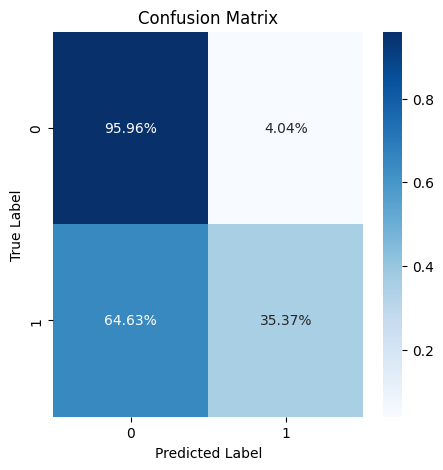

In [0]:
train_df = spark.read.format("delta").load(f"{team_blob_url}/saket_output_delta_FinalML_nonull_10723AM/")
val_df = spark.read.format("delta").load(f"{team_blob_url}/saket_output_delta_val_FinalML_nonull_10723AM/")
print(train_df.count())
print(val_df.count())
DATE_COLS = []
# Make sure 'DEP_DEL15' is the last value in this list
#'FL_DATE',
NUM_FEATURES_COLS = ['HourlyWindGustSpeed', 'DISTANCE', 'MIN_DIST_FROM_HOLIDAY', 'HourlyAltimeterSetting', 
                     'HourlyDewPointTemperature', 'HourlyDryBulbTemperature',  'HourlyPressureChange', 'previous_flight_delay_status', 
                     'Outlinks','num_fl_departing_this_hour_ORIGIN', 'num_fl_arriving_this_hour_ORIGIN',  'HourlyPrecipitation', 'HourlyRelativeHumidity', 
                     'HourlySeaLevelPressure', 'HourlyStationPressure',  'HourlyWetBulbTemperature', 'HourlyWindDirection', 'HourlyWindSpeed', 'total_flights_on_fl_date_origin', 
                     'temperature_fahrenheit', 'Is_Holiday','flights_delayed_at_current_origin', 'DEP_DEL15']
CAT_FEATURES_COLS = ['DAY_OF_MONTH','DAY_OF_WEEK',  'OP_UNIQUE_CARRIER',  'ORIGIN', 'DEST', 
                     'is_CLR', 'is_FEW', 'is_BKN', 'is_OVC', 'is_SCT', 'is_VV', 'is_X',
                     'dep_Hour',  'QUARTER', 'MONTH','origin_type','dest_type'] #'FL_ID',
LABEL = 'DEP_DEL15'

## Call the function to do Logistic Regression
trainandeval_lr(train_df, val_df)

In [0]:
print(train_df.columns)

['FL_DATE', 'Elevation', 'sched_depart_date_time_UTC', 'two_hours_prior_depart_UTC', 'ORIGIN', 'OP_CARRIER_FL_NUM', 'TAIL_NUM', 'QUARTER', 'DAY_OF_MONTH', 'DAY_OF_WEEK', 'OP_UNIQUE_CARRIER', 'OP_CARRIER_AIRLINE_ID', 'DEST', 'DEST_CITY_NAME', 'DEST_STATE_ABR', 'DEST_STATE_FIPS', 'DEST_STATE_NM', 'DEST_WAC', 'CRS_DEP_TIME', 'DEP_TIME', 'DEP_DELAY', 'DEP_DELAY_NEW', 'DEP_DEL15', 'DISTANCE', 'YEAR', 'MONTH', 'origin_type', 'dest_type', 'previous_flight_delay_status', 'MIN_DIST_FROM_HOLIDAY', 'Outlinks', 'Is_Holiday', 'FL_ID', 'dep_Hour', 'arr_Hour', 'num_fl_departing_this_hour_ORIGIN', 'num_fl_arriving_this_hour_ORIGIN', 'FL_SURR_KEY', 'HourlyAltimeterSetting', 'HourlyDewPointTemperature', 'HourlySkyConditions', 'HourlyPressureChange', 'HourlyWindGustSpeed', 'HourlyDryBulbTemperature', 'HourlyPrecipitation', 'HourlyRelativeHumidity', 'HourlySeaLevelPressure', 'HourlyStationPressure', 'HourlyVisibility', 'HourlyWetBulbTemperature', 'HourlyWindDirection', 'HourlyWindSpeed', 'total_flights_on

In [0]:
df_final_Adam = train_df.select('HourlyWindGustSpeed', 'DISTANCE', 'MIN_DIST_FROM_HOLIDAY', 'HourlyAltimeterSetting', 
                     'HourlyDewPointTemperature', 'HourlyDryBulbTemperature',  'HourlyPressureChange', 'previous_flight_delay_status', 
                     'Outlinks','num_fl_departing_this_hour_ORIGIN', 'num_fl_arriving_this_hour_ORIGIN',  'HourlyPrecipitation', 'HourlyRelativeHumidity', 
                     'HourlySeaLevelPressure', 'HourlyStationPressure',  'HourlyWetBulbTemperature', 'HourlyWindDirection', 'HourlyWindSpeed', 'total_flights_on_fl_date_origin', 
                     'temperature_fahrenheit', 'Is_Holiday','flights_delayed_at_current_origin', 'DEP_DEL15','DAY_OF_MONTH','DAY_OF_WEEK',  'OP_UNIQUE_CARRIER',  'ORIGIN', 'DEST', 
                     'is_CLR', 'is_FEW', 'is_BKN', 'is_OVC', 'is_SCT', 'is_VV', 'is_X',
                     'dep_Hour',  'QUARTER', 'MONTH','origin_type','dest_type')
df_final_Adam.write.format('delta').mode('overwrite').option("overwriteSchema", "true").save(f"{team_blob_url}/For_Adam_Input_FinalML_10723/")

In [0]:
df_final_Adam_val = val_df.select('HourlyWindGustSpeed', 'DISTANCE', 'MIN_DIST_FROM_HOLIDAY', 'HourlyAltimeterSetting', 
                     'HourlyDewPointTemperature', 'HourlyDryBulbTemperature',  'HourlyPressureChange', 'previous_flight_delay_status', 
                     'Outlinks','num_fl_departing_this_hour_ORIGIN', 'num_fl_arriving_this_hour_ORIGIN',  'HourlyPrecipitation', 'HourlyRelativeHumidity', 
                     'HourlySeaLevelPressure', 'HourlyStationPressure',  'HourlyWetBulbTemperature', 'HourlyWindDirection', 'HourlyWindSpeed', 'total_flights_on_fl_date_origin', 
                     'temperature_fahrenheit', 'Is_Holiday','flights_delayed_at_current_origin', 'DEP_DEL15','DAY_OF_MONTH','DAY_OF_WEEK',  'OP_UNIQUE_CARRIER',  'ORIGIN', 'DEST', 
                     'is_CLR', 'is_FEW', 'is_BKN', 'is_OVC', 'is_SCT', 'is_VV', 'is_X',
                     'dep_Hour',  'QUARTER', 'MONTH','origin_type','dest_type')
df_final_Adam_val.write.format('delta').mode('overwrite').option("overwriteSchema", "true").save(f"{team_blob_url}/For_Adam_Input_FinalML_val_10723/")

In [0]:
print(df_final_Adam.count())
print(df_final_Adam_val.count())

23669325
7154007


In [0]:
train_df = spark.read.format("delta").load(f"{team_blob_url}/For_Adam_Input_FinalML_10723/")
val_df = spark.read.format("delta").load(f"{team_blob_url}/For_Adam_Input_FinalML_val_10723/")


train_df.cache()

DataFrame[HourlyWindGustSpeed: string, DISTANCE: double, MIN_DIST_FROM_HOLIDAY: double, HourlyAltimeterSetting: string, HourlyDewPointTemperature: string, HourlyDryBulbTemperature: string, HourlyPressureChange: string, previous_flight_delay_status: double, Outlinks: bigint, num_fl_departing_this_hour_ORIGIN: bigint, num_fl_arriving_this_hour_ORIGIN: bigint, HourlyPrecipitation: string, HourlyRelativeHumidity: string, HourlySeaLevelPressure: string, HourlyStationPressure: string, HourlyWetBulbTemperature: string, HourlyWindDirection: string, HourlyWindSpeed: string, total_flights_on_fl_date_origin: bigint, temperature_fahrenheit: double, Is_Holiday: int, flights_delayed_at_current_origin: double, DEP_DEL15: double, DAY_OF_MONTH: int, DAY_OF_WEEK: int, OP_UNIQUE_CARRIER: string, ORIGIN: string, DEST: string, is_CLR: int, is_FEW: int, is_BKN: int, is_OVC: int, is_SCT: int, is_VV: int, is_X: int, dep_Hour: int, QUARTER: int, MONTH: int, origin_type: string, dest_type: string]

In [0]:
print(df_final_Adam.columns)

['HourlyWindGustSpeed', 'DISTANCE', 'MIN_DIST_FROM_HOLIDAY', 'HourlyAltimeterSetting', 'HourlyDewPointTemperature', 'HourlyDryBulbTemperature', 'HourlyPressureChange', 'previous_flight_delay_status', 'Outlinks', 'num_fl_departing_this_hour_ORIGIN', 'num_fl_arriving_this_hour_ORIGIN', 'HourlyPrecipitation', 'HourlyRelativeHumidity', 'HourlySeaLevelPressure', 'HourlyStationPressure', 'HourlyWetBulbTemperature', 'HourlyWindDirection', 'HourlyWindSpeed', 'total_flights_on_fl_date_origin', 'temperature_fahrenheit', 'Is_Holiday', 'flights_delayed_at_current_origin', 'DEP_DEL15', 'DAY_OF_MONTH', 'DAY_OF_WEEK', 'OP_UNIQUE_CARRIER', 'ORIGIN', 'DEST', 'is_CLR', 'is_FEW', 'is_BKN', 'is_OVC', 'is_SCT', 'is_VV', 'is_X', 'dep_Hour', 'QUARTER', 'MONTH', 'origin_type', 'dest_type']


In [0]:
train_df = spark.sql("SELECT * FROM Dataset_l9_final_day_temp")

train_df.cache()

DataFrame[wind_gusts_mph: decimal(21,9), precipitation_mm: double, temperature_fahrenheit: double, FL_DATE: date, sched_depart_date_time_UTC: timestamp, four_hours_prior_depart_UTC: timestamp, two_hours_prior_depart_UTC: timestamp, DATE: timestamp, WindEquipmentChangeDate: date, scheduled_dep_timestamp: timestamp, actual_dep_timestamp: timestamp, scheduled_arr_timestamp: timestamp, actual_arr_timestamp: timestamp, earlier_timestamp: timestamp, scheduled_dep_time_UTC: timestamp, scheduled_arr_time_UTC: timestamp, ORIGIN: string, OP_CARRIER_FL_NUM: int, TAIL_NUM: string, QUARTER: int, DAY_OF_MONTH: int, DAY_OF_WEEK: int, OP_UNIQUE_CARRIER: string, OP_CARRIER_AIRLINE_ID: int, OP_CARRIER: string, ORIGIN_AIRPORT_ID: int, ORIGIN_AIRPORT_SEQ_ID: int, ORIGIN_CITY_MARKET_ID: int, ORIGIN_CITY_NAME: string, ORIGIN_STATE_ABR: string, ORIGIN_STATE_FIPS: int, ORIGIN_STATE_NM: string, ORIGIN_WAC: int, DEST_AIRPORT_ID: int, DEST_AIRPORT_SEQ_ID: int, DEST_CITY_MARKET_ID: int, DEST: string, DEST_CITY_NA

## BEST RESULTS

From the POV of our chosen metrics this GBT model is the best attempt
We went in with hardcoded hyperparams since we had extracted the best params earlier

In [0]:
train_df = spark.read.format("delta").load(f"{team_blob_url}/For_Adam_Input_FinalML_10723/")
val_df = spark.read.format("delta").load(f"{team_blob_url}/saket_output_delta_val_FinalML_nonull_10723AM/")

In [0]:
# Instantiate Gradient Boosted Tree Classifier
DATE_COLS = []
# Make sure 'DEP_DEL15' is the last value in this list
#'FL_DATE',
NUM_FEATURES_COLS = ['HourlyWindGustSpeed', 'DISTANCE', 'MIN_DIST_FROM_HOLIDAY', 'HourlyAltimeterSetting', 
                     'HourlyDewPointTemperature', 'HourlyDryBulbTemperature',  'HourlyPressureChange', 'previous_flight_delay_status', 
                     'Outlinks','num_fl_departing_this_hour_ORIGIN', 'num_fl_arriving_this_hour_ORIGIN',  'HourlyPrecipitation', 'HourlyRelativeHumidity', 
                     'HourlySeaLevelPressure', 'HourlyStationPressure',  'HourlyWetBulbTemperature', 'HourlyWindDirection', 'HourlyWindSpeed', 'total_flights_on_fl_date_origin', 
                     'temperature_fahrenheit', 'Is_Holiday','flights_delayed_at_current_origin', 'DEP_DEL15']
CAT_FEATURES_COLS = ['DAY_OF_MONTH','DAY_OF_WEEK',  'OP_UNIQUE_CARRIER',  'ORIGIN', 'DEST', 
                     'is_CLR', 'is_FEW', 'is_BKN', 'is_OVC', 'is_SCT', 'is_VV', 'is_X',
                     'dep_Hour',  'QUARTER', 'MONTH','origin_type','dest_type'] #'FL_ID',
LABEL = 'DEP_DEL15'

train_texperiment_df, val_texperiment_df, evaluator = prepML(train_df, val_df)
gbt = GBTClassifier(featuresCol='features', labelCol='DEP_DEL15', maxIter=25, maxDepth=10, stepSize=0.05)

gbtModel = gbt.fit(train_texperiment_df)

# Evaluate Model
#gbt_cvModel = gbt_crossval.fit(train_texperiment_df)
print('GBT Training AUC: ', evaluator.evaluate(gbtModel.transform(train_texperiment_df)))
print('GBT Classifier AUC: ', evaluator.evaluate(gbtModel.transform(val_texperiment_df)))

23669325
7154007
GBT Training AUC:  0.7987776594034128
GBT Classifier AUC:  0.7884826617828646


Accuracy: 0.8525564807129635
Precision: 0.8369132885644734
Recall: 0.8525564807129634
F1 score: 0.8359272846455639


/databricks/spark/python/pyspark/sql/context.py:165: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


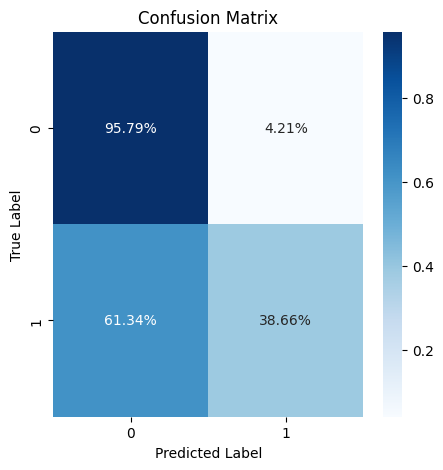

In [0]:
# Make predictions on the validation dataset
predictions = gbtModel.transform(val_texperiment_df)
# Compute accuracy, precision, recall, and f1 score
evaluator_accuracy = MulticlassClassificationEvaluator(labelCol='DEP_DEL15', metricName='accuracy')
evaluator_precision = MulticlassClassificationEvaluator(labelCol='DEP_DEL15', metricName='weightedPrecision')
evaluator_recall = MulticlassClassificationEvaluator(labelCol='DEP_DEL15', metricName='weightedRecall')
evaluator_f1 = MulticlassClassificationEvaluator(labelCol='DEP_DEL15', metricName='f1')
accuracy = evaluator_accuracy.evaluate(predictions)
precision = evaluator_precision.evaluate(predictions)
recall = evaluator_recall.evaluate(predictions)
f1 = evaluator_f1.evaluate(predictions)

# Print accuracy, precision, recall, and f1 score
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 score:', f1)
# Compute confusion matrix
predictionAndLabels = predictions.select('prediction', 'DEP_DEL15').rdd
metrics = MulticlassMetrics(predictionAndLabels)

confusion_matrix = metrics.confusionMatrix().toArray()

confusion_matrix = confusion_matrix.astype('float') / confusion_matrix.sum(axis=1)[:, np.newaxis]

# Plot confusion matrix using seaborn heatmap
plt.figure(figsize=(5, 5))
sns.heatmap(confusion_matrix, annot=True, fmt='.2%', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

## NEURAL MLP 

We ran this from another notebook & the time taken was super high so we had to abdandon the idea of finetuning and running again

In [0]:
## TRAINING NEURAL NETWORKS with the new dataset
train_df = spark.read.format("delta").load(f"{team_blob_url}/For_Adam_Input_FinalML_10723/")
val_df = spark.read.format("delta").load(f"{team_blob_url}/For_Adam_Input_FinalML_val_10723/")

DATE_COLS = [ ]
# Make sure 'DEP_DEL15' is the last value in this list
#'FL_DATE',
NUM_FEATURES_COLS = ['HourlyWindGustSpeed', 'DISTANCE', 'MIN_DIST_FROM_HOLIDAY', 'HourlyAltimeterSetting', 
                     'HourlyDewPointTemperature', 'HourlyDryBulbTemperature',  'HourlyPressureChange', 'previous_flight_delay_status', 
                     'Outlinks','num_fl_departing_this_hour_ORIGIN', 'num_fl_arriving_this_hour_ORIGIN',  'HourlyPrecipitation', 'HourlyRelativeHumidity', 
                     'HourlySeaLevelPressure', 'HourlyStationPressure',  'HourlyWetBulbTemperature', 'HourlyWindDirection', 'HourlyWindSpeed', 'total_flights_on_fl_date_origin', 
                     'temperature_fahrenheit', 'Is_Holiday','flights_delayed_at_current_origin', 'DEP_DEL15']
CAT_FEATURES_COLS = ['DAY_OF_MONTH','DAY_OF_WEEK',  'OP_UNIQUE_CARRIER',  'ORIGIN', 'DEST', 
                     'is_CLR', 'is_FEW', 'is_BKN', 'is_OVC', 'is_SCT', 'is_VV', 'is_X',
                     'dep_Hour',  'QUARTER', 'MONTH','origin_type','dest_type'] #'FL_ID',
LABEL = 'DEP_DEL15'

## Call the function to do Logistic Regression
trainandeval_mlp(train_df, val_df)


#### NOTE: PLEASE SEE THE ATTEMPT SCREENSHOT BELOW #####

![MLP Run Attempt 1](/files/tables/Screenshot_2023_08_11_at_7_33_42_AM.png)

23669325
7154007
These are the layers of the MLP [882, 40, 32, 24, 16, 16, 8, 2]
Starting the training
Finished the training
MLP Training AUC:  0.6742565100874364
MLP Validation AUC:  0.6676213292334019
MLP Training Accuracy:  0.8215657802574937
MLP Validation Accuracy:  0.8155978099870307
MLP Training Precision:  0.7986000867943234
MLP Validation Precision:  0.8004281807205644
MLP Training Recall:  0.8215657802574938
MLP Validation Recall:  0.8155978099870307


/databricks/spark/python/pyspark/sql/context.py:165: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


[[5.833963e+06 8.000000e+00]
 [1.319024e+06 2.200000e+01]]


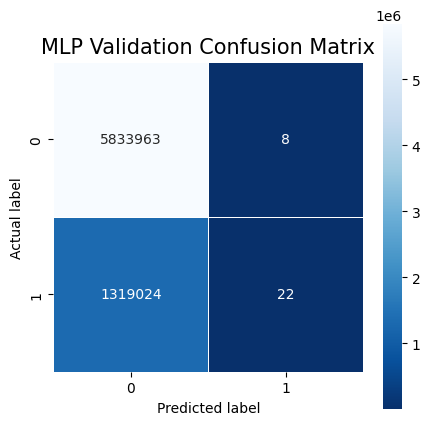

In [0]:
## TRAINING NEURAL NETWORKS with the new dataset
train_df = spark.read.format("delta").load(f"{team_blob_url}/For_Adam_Input_FinalML_10723/")
val_df = spark.read.format("delta").load(f"{team_blob_url}/For_Adam_Input_FinalML_val_10723/")

DATE_COLS = []
# Make sure 'DEP_DEL15' is the last value in this list
#'FL_DATE',
NUM_FEATURES_COLS = ['HourlyWindGustSpeed', 'DISTANCE', 'MIN_DIST_FROM_HOLIDAY', 'HourlyAltimeterSetting', 
                     'HourlyDewPointTemperature', 'HourlyDryBulbTemperature',  'HourlyPressureChange', 'previous_flight_delay_status', 
                     'Outlinks','num_fl_departing_this_hour_ORIGIN', 'num_fl_arriving_this_hour_ORIGIN',  'HourlyPrecipitation', 'HourlyRelativeHumidity', 
                     'HourlySeaLevelPressure', 'HourlyStationPressure',  'HourlyWetBulbTemperature', 'HourlyWindDirection', 'HourlyWindSpeed', 'total_flights_on_fl_date_origin', 
                     'temperature_fahrenheit', 'Is_Holiday','flights_delayed_at_current_origin', 'DEP_DEL15']
CAT_FEATURES_COLS = ['DAY_OF_MONTH','DAY_OF_WEEK',  'OP_UNIQUE_CARRIER',  'ORIGIN', 'DEST', 
                     'is_CLR', 'is_FEW', 'is_BKN', 'is_OVC', 'is_SCT', 'is_VV', 'is_X',
                     'dep_Hour',  'QUARTER', 'MONTH','origin_type','dest_type'] #'FL_ID',
LABEL = 'DEP_DEL15'

## Call the function to do Logistic Regression
trainandeval_mlp(train_df, val_df)

In [0]:
## TRAINING NEURAL NETWORKS with the new dataset
train_df = spark.read.format("delta").load(f"{team_blob_url}/For_Adam_Input_FinalML_10723/")
val_df = spark.read.format("delta").load(f"{team_blob_url}/For_Adam_Input_FinalML_val_10723/")

DATE_COLS = []
# Make sure 'DEP_DEL15' is the last value in this list
#'FL_DATE',
NUM_FEATURES_COLS = ['HourlyWindGustSpeed', 'DISTANCE', 'MIN_DIST_FROM_HOLIDAY', 'HourlyAltimeterSetting', 
                     'HourlyDewPointTemperature', 'HourlyDryBulbTemperature',  'HourlyPressureChange', 'previous_flight_delay_status', 
                     'Outlinks','num_fl_departing_this_hour_ORIGIN', 'num_fl_arriving_this_hour_ORIGIN',  'HourlyPrecipitation', 'HourlyRelativeHumidity', 
                     'HourlySeaLevelPressure', 'HourlyStationPressure',  'HourlyWetBulbTemperature', 'HourlyWindDirection', 'HourlyWindSpeed', 'total_flights_on_fl_date_origin', 
                     'temperature_fahrenheit', 'Is_Holiday','flights_delayed_at_current_origin', 'DEP_DEL15']
CAT_FEATURES_COLS = ['DAY_OF_MONTH','DAY_OF_WEEK',  'OP_UNIQUE_CARRIER',  'ORIGIN', 'DEST', 
                     'is_CLR', 'is_FEW', 'is_BKN', 'is_OVC', 'is_SCT', 'is_VV', 'is_X',
                     'dep_Hour',  'QUARTER', 'MONTH','origin_type','dest_type'] #'FL_ID',
LABEL = 'DEP_DEL15'

## Call the function to do Logistic Regression
trainandeval_mlp(train_df, val_df)9

23669325
7154007
These are the layers of the MLP [882, 80, 60, 40, 32, 24, 16, 8, 2]
Starting the training


## END OF NOTEBOOK